In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
target = 'https://help.wrike.com/hc/en-us/articles/209603709-Tasks'

In [5]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [6]:
df = pd.read_csv('../data/help_title.csv', sep=';')

In [7]:
url_list = df['url_4'].values.tolist()

In [9]:
def extract_keywords(subsection1):
    keywords = []
    deprecated_words = {'Overview', 'Important Information'}
    for keyword in subsection1.find_all('a'):
        keyword = keyword.text.strip()
        if keyword not in deprecated_words:
            keywords.append(keyword)
    return keywords

In [19]:
from time import sleep
from tqdm import tqdm_notebook as tqdm


def get_by_id(prev_url, url, soup):
    try:
        res = requests.get(url, headers=headers)
    except:
        return None, None, soup, url
    if url != prev_url:
        soup = BeautifulSoup(res.content, "html.parser")
        
    h = 'h2'
    anchor = url.split('#')[1]
    a_tag = soup.find(id=anchor)
    if not a_tag:
        print('anchor:', anchor)
        return None, None, soup, url
    
    s = a_tag.parent
    if s:
        link_tag = s.find('a')
        section_text = s.text
        if link_tag:
            link = link_tag.get('id')
            print(s.text, f'{url}')
            print(link)
            
            keywords = []
            siblings = s.findNextSiblings()
            for sib in siblings:
                if sib.name == h:
                    break
#                 print('\t\t', sib.text)
                keywords += extract_keywords(sib)
                section_text += '\n' + sib.text
#             print('keywords', keywords)
            return section_text, keywords, soup, url
    return None, None, soup, url

s_text_list, keywords_list = [], []

prev_url = None
soup = None

for url in tqdm(url_list):
    s_text, keywords, soup, prev_url = get_by_id(prev_url, url, soup)
    print(s_text)
    s_text_list.append(s_text)
    keywords_list.append(keywords)
    sleep(0.2)
s_text_list, keywords_list

/Users/o/work/PycharmProjects/venvs/wrike/lib/python3.7/site-packages/ipykernel_launcher.py:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Create a Task https://help.wrike.com/hc/en-us/articles/209603709-Tasks#create
create
Create a Task

Select a Folder or Project from the left-hand Folder tree (this is where your task will be created). 
Click the green plus sign in the Workspace's upper left-hand corner 1 and select "Task" 2. 
Type a task name and press "Enter". 

Your task is created and you can begin adding task attributes from the Task View 3 (assignee, due dates, and more) or right-click on a task from the List View to access quick edit options 4. 
 
Assign a Task https://help.wrike.com/hc/en-us/articles/209603709-Tasks#assign
assign
Assign a Task
Choose the names of people to whom you want to assign a task, using the drop-down menu. Or you can type the first letters of the name, and Wrike will suggest an appropriate list of people. You can assign the task to as many people as you need. If the right name is not in the drop-down menu, you can invite that person to join Wrike and grant him or her a license. Read more 

Important Information https://help.wrike.com/hc/en-us/articles/210323245-Subtasks#important
important
Important Information

In some cases, Wrike asks if you want to align parent and subtask dates, but date alignment is optional, you can always schedule a subtask independently of the parent task’s scheduled dates and vice versa.
Automatically complete all of a task's active subtasks by completing a parent task and clicking "Yes" on the pop-up that appears 1. Cancel or defer all active subtasks in the same way.
Subtasks must have scheduled start and end dates in order to appear on the Gantt Chart.


Create a Subtask https://help.wrike.com/hc/en-us/articles/210323245-Subtasks#create
create
Create a Subtask

Open the parent task where you would like to add a subtask.
Click the “Add subtask” button (or “+ New task" if there are existing subtasks) from the Task View panel.
Enter a name for your subtask.
Press Enter on your keyboard.

Your subtask is instantly created and you can click on it

Overview https://help.wrike.com/hc/en-us/articles/115005055469-Subtask-Alignment-#overview
overview
Overview
Subtasks and parent tasks can have unique start and end dates. However, as you reschedule subtasks and parent tasks Wrike asks if you want to align dates so that things stay in sync (you can always opt not to align dates).  
Wrike asks if you want to align dates in two scenarios:

Expanding parent task dates. If you reschedule subtasks to before or after the parent task’s dates - Wrike asks if you want to expand the parent task dates to encompass its subtasks.* 
Shifting task dates. If you reschedule a parent task (while keeping the duration the same) - Wrike asks if you want to reschedule subtasks as well.*  

*These are the general rules, more details about the specific cases when you may be asked to align tasks are below.
Expanding Parent Task Dates https://help.wrike.com/hc/en-us/articles/115005055469-Subtask-Alignment-#expanding
expanding
Expanding Parent Task Dates
Wrike a

Create a Google Drive File From Wrike https://help.wrike.com/hc/en-us/articles/209603309-Attachments#create
create
Create a Google Drive File From Wrike
To create a Google Drive file from Wrike:

Open the task, folder, or project where you would like to create and attach the file.
Click on “Attach files.” 1
Hover over “From Google Drive.” 2
Select “Create new file.”* 3
In the pop-up that appears 4 choose what type of file you would like to create: a document, spreadsheet, or presentation.
Enter a name for your file and click “Create.” 5
Your newly created document will appear in a new window.
Add information to your file and close the window whenever you are ready.
Your file is now attached to the task, folder, or project that you created it from in Wrike. All users who have access to the task, folder, or project will be able to access the file.

*Note: If this is your first time adding or creating Google Drive files from Wrike, you will be prompted to enter your Google Drive credentia

Change How Tasks are Sorted https://help.wrike.com/hc/en-us/articles/210323325-List-View-Sorting-and-Prioritizing-Tasks#change
change
Change How Tasks are Sorted

Select a folder or project from the Workspace’s left-hand Navigation panel.
Click the current sorting option at the top of the List View.
From the dropdown list which appears, choose the sorting option you would like to apply.

How your tasks are sorted immediately changes to reflect your choice.
Overview https://help.wrike.com/hc/en-us/articles/209603889-Mass-Editing#overview
overview
Overview
Use mass editing in the List view to make the same changes to multiple tasks at the same time.
Important Information https://help.wrike.com/hc/en-us/articles/209603889-Mass-Editing#important
important
Important Information

External Users are not able to use mass editing options related to sharing and assigning tasks.
You can only mass edit tasks, not folders and projects.

Mass Edit Tasks https://help.wrike.com/hc/en-us/articles/20960

Duplicate a Task https://help.wrike.com/hc/en-us/articles/209603869-Duplicate-Tasks-and-Subtasks#duplicate
duplicate
Duplicate a Task
1. Open the Folder or Project which contains the task you want to duplicate and switch to the List View. 1 2. Right click on the task you want to duplicate. 2 3. Select “Duplicate” from the dropdown list that appears. 3 4. In the pop-up that appears 4: enter a name for the task, select the Folder or Project where the task should be created* and customize how the task should be duplicated. Check the toggle next to each option to:
- Copy description: copy the task description when the task is duplicated - Copy attachments: include the same attachments on the duplicated task - Copy assignees: keep the same assignees when the task is duplicated - Copy Custom Fields (for Business and Enterprise users): duplicated tasks always have the same Custom Fields as the original task, but this toggle signals that data entered in the original task should be copied to th

Edit a Recurrence https://help.wrike.com/hc/en-us/articles/209603769-Make-a-Task-Recurrent#edit
edit
Edit a Recurrence

Open any task which is part of the recurrence.
Click on the task’s three-dot menu button in its upper right-hand corner.
Select “Edit recurrence”.
From the pop-up you can:

Edit the frequency settings section 1 for all tasks in a recurrence
Rename the tasks 2
Add or remove the tasks from folders or projects 3
Edit assignees 4, the task’s duration 5, importance 6, and who the tasks are shared with 7
Double click in the task’s description to edit the description for all tasks in the recurrence 8


Click “Save”. 9

Please note, you can edit an individual task by selecting the task you would like to edit and making changes to the individual task as you normally would. The rest of the tasks in the recurrence are not affected.


Resume a Recurrence


Open any task which is part of the recurrence.
Click on the task’s menu button in its upper right-hand corner.
Select “Edit r

Open a Folder or Project’s Info Panel https://help.wrike.com/hc/en-us/articles/209603389-Folder-and-Project-Info-Panels#open
open
Open a Folder or Project’s Info Panel

Select a Folder or Project from the Workspace’s left-hand Navigation panel. 1
Click the “Folder info” button 2 (located on the top right-hand corner of the List View panel).

The Folder or Project’s info panel will open to the right of the List View panel.



Navigate Info Panels https://help.wrike.com/hc/en-us/articles/209603389-Folder-and-Project-Info-Panels#navigate
navigate
Navigate Info Panels
From a Folder or Project’s info panel you can:

Tag a Folder or Project in additional locations.
Attach files directly to the Folder or Project. 1
View and edit who the Folder or Project is shared with. 2
Change the Folder or Project’s default workflow.
View and edit who follows the Folder or Project. 3
Access a Folder or Project’s Permalink or direct email address. 4
Click the menu button 5 to access options to: print the in

Roll Up Project Dates https://help.wrike.com/hc/en-us/articles/209603489-Projects#rollup
rollup
Roll Up Project Dates
Project dates rollup is available on Business and higher accounts. Regular users can enable dates rollup for projects.
Instead of manually setting up project dates, you can enable dates rollup. Wrike will automatically check the start and end dates of all subprojects, tasks, and subtasks within the project and set the earliest start date and the latest end date for the project.
To roll up project dates:

Select a project on the left-hand navigation panel.
Click on the three-dot menu button in the upper-right corner of the project info panel.
Select “Enable Dates Rollup.”
In the window that appears click “Enable and reschedule.”

The project’s dates will be set automatically and you’ll no longer be able to change them manually. If you or other users change the start date of the earliest task, subtask, or subproject or the end date of the latest one, the rolled-up project

Convert Existing Folders and Projects https://help.wrike.com/hc/en-us/articles/209603649-Subfolders-and-Subprojects#convert
convert
Convert Existing Folders and Projects

From the Workspace’s left-hand Navigation panel, select a Folder or Project.
Open the Folder or Project info panel.
Click the “+” button which appears underneath the Folder or Project’s name.
Begin typing the name of another Folder or Project.
Select the appropriate Folder or Project from the dropdown list when it appears.

The Folder or Project you originally selected is now a Subfolder or Subproject in the location where you added (tagged) it.
Please note, the steps above are for including existing Folders or Projects in additional or multiple locations. If you would like to move a Folder or Project from one location to another, please read our help center page on moving Tasks, Folders, and Projects.
Overview https://help.wrike.com/hc/en-us/articles/209603669-Sharing-Folders-and-Projects#overview
overview
Overview
S

Create and Customize Access Roles https://help.wrike.com/hc/en-us/articles/209603589-Access-Roles#create
create
Create and Customize Access Roles
Enterprise admins with the right to “Edit Access Roles” can create and customize Access Roles.
Admins can create new roles, decide which rights are associated with each of the roles and rename the roles.
Create and Customize Access Roles https://help.wrike.com/hc/en-us/articles/209603589-Access-Roles#create
create
Create and Customize Access Roles
Enterprise admins with the right to “Edit Access Roles” can create and customize Access Roles.
Admins can create new roles, decide which rights are associated with each of the roles and rename the roles.
Create and Customize Access Roles https://help.wrike.com/hc/en-us/articles/209603589-Access-Roles#create
create
Create and Customize Access Roles
Enterprise admins with the right to “Edit Access Roles” can create and customize Access Roles.
Admins can create new roles, decide which rights are associ

Delete a Folder or Project https://help.wrike.com/hc/en-us/articles/210322965-Delete-a-Folder-or-Project#delete
delete
Delete a Folder or Project
Regular and External Users on all account types can move items to Recycle Bin.
Option 1

Right click on a Folder or Project from the left-hand Navigation panel.
Select “Delete” from the dropdown list that appears.

Your Folder or Project is moved to the Recycle Bin. 
Option 2

Open a Folder or Project’s info panel.
Click on the menu button in the info panel’s upper right-hand corner.
Select “Delete” from the dropdown list that appears.

Your Folder or Project is moved to the Recycle Bin.

Option 3
To delete a Subfolder or Subproject:

Right-click a Subfolder or Subproject in the List View.
Select "Delete".

Your Subfolder or Subproject is moved to the Recycle Bin.
Permanently Delete a Folder or Project https://help.wrike.com/hc/en-us/articles/210322965-Delete-a-Folder-or-Project#permanently
permanently
Permanently Delete a Folder or Project
A

Project Health Color-Coding https://help.wrike.com/hc/en-us/articles/360010428113-Project-Progress#color
color
Project Health Color-Coding
Enable color-coding to make the progress bar and Progress panel header appear in the color that matches current progress. If a project’s progress color and status don’t match, Wrike suggests you change the status.
To enable color-coding:

Open the Progress panel.
Check the box to the left of “Project health.”

Projects can have four different colors depending on their progress:

Green: Isn’t overdue and has zero risks.
Amber: Isn’t overdue and has at least one risk but not all are risks.
Red: Is overdue or contains all risks.
Grey: Cancelled, completed, or on hold project status or dates are incorrect (e.g., its finish date is earlier than its start date).

🖐Note: If color-coding is disabled or if the project doesn’t have a start or due date, the progress status bar is blue.
Project Risks

The deviation is more than 25%.
At least one task in a proje

Add Folders and Projects to a Space https://help.wrike.com/hc/en-us/articles/360020311174-Spaces-Overview#add
add
Add Folders and Projects to a Space
Space members and Space admins can add folders and projects to a Space.
When you add folders and projects to a Space, they appear under the Space’s name in the left-hand navigation panel. To add a folder/project to a Space:

Open a folder or project’s info panel.
Click the “+” button which appears underneath the folder or project’s title.
Begin typing the Space’s title.
Select the Space from the list when it appears. If there are several items with the same name, look for the word “Space” under the name to distinguish it from folders and projects.

Leave a Space https://help.wrike.com/hc/en-us/articles/360020311174-Spaces-Overview#leave
leave
Leave a Space
You can leave a Space at any time, unless you are the only Space admin. In that case, you’ll need to add another admin to the Space first.
There are two ways to leave a Space:

Click a 

 Assign Space Admin Role https://help.wrike.com/hc/en-us/articles/360017905033-Manage-Spaces-for-Space-Admins-#assign
assign
 Assign Space Admin Role
Space creators and Space admins can assign the Space admin role to other users. External users and collaborators cannot be Space admins.
Select Space Admins While Creating the Space
When you create a Space you are automatically designated as a Space admin. You can add other admins whilst creating the Space:

In the Space creation window, click on the search field in the “Members” section and select a user from the list.
If you don't see someone in the list: start typing their name and select them once they appear.
Click on the name of the user to add them to a Space. In the drop-down menu to the right of the user’s name, change the role of the user to admin.
Click “Create”.

Add Another Space Admin to an Existing Space
As a Space admin, you can assign the Space admin role to Space members. To do that:

Click the Space’s name in the left-h

Archive a Space https://help.wrike.com/hc/en-us/articles/360017905033-Manage-Spaces-for-Space-Admins-#archive
archive
Archive a Space
As a Space admin, you can archive Spaces.

Right-click on a Space’s title in the left-hand navigation panel.
Select “Archive Space”.
Click “Archive” to confirm your decision.

The archived Space disappears from the left-hand navigation panel in the workspaces of all Space users. If you had the archived Space or items within it opened in any view, you will automatically be redirected to a Space that is directly above the archived one on the panel. An archived Space can still be found in the Archived tab within "Explore Spaces".
Delete a Space https://help.wrike.com/hc/en-us/articles/360017905033-Manage-Spaces-for-Space-Admins-#delete
delete
Delete a Space
As a Space admin, you can delete Spaces.

Right-click on a Space’s title in the left-hand navigation panel.
Select “Delete Space”.
Click “Delete” to confirm your decision.

The deleted Space disappears f

Approve a Task, Folder or a Project https://help.wrike.com/hc/en-us/articles/360023006313-Approvals#approve
approve
Approve a Task, Folder or a Project
All the tasks/folders/projects waiting for your approval can be found in your Inbox. Or, you can filter tasks, folders and projects according to their approval status, start and due date, creation date or assigned approvers.
🔥Wrike Tip! Create a dashboard widget to see all tasks or projects with pending approvals from one place.
To approve a task/folder/project:

Open a task, folder or a project that needs to be approved.
Find the approval panel at the top of the description field.
Hover over the number of approvers to the left of the “Approve” button to see who else is assigned for approval of the task/folder/project and whose approvals are pending.
Click “Approve” 1 or “Reject” 2 based on your decision.
Thereafter, the comment field appears where you can add some details on your approval.
Click "Send comment". 3


Until the approval i

Wrike Proof Comment Export https://help.wrike.com/hc/en-us/articles/210322845-Proofing#export
export
Wrike Proof Comment Export
You can export files from Proofing together with all the comments as a PDF. 
To export a PDF file:

Open a task.
Click the file you want to download (from the attachments section).
Click the three-dot menu in the upper right-hand corner.
Select “Export with comments”.

The download of the PDF file starts immediately.
Note that in the exported PDF document, line, arrow and box markups are all converted into PDF comments (sticky notes) at the original markup position. Proofing comments from MediaValet attachments and password-protected PDFs cannot be exported.
Video Proofing https://help.wrike.com/hc/en-us/articles/210322845-Proofing#video
video
Video Proofing
Use video Proofing to add comments at specific times and locations on a video. 
Video Proofing works like image/doc Proofing:  

Attach a video. 

Click "Attach files" above the description field and uploa

Important Information https://help.wrike.com/hc/en-us/articles/360009639733-Guest-Reviews#important
important
Important Information

Guest Users can see only files from reviews assigned to them. They don’t have access to your Wrike data (tasks, folders and projects).
You can work with Proofing comments added by Guest Users in the same way you work with regular Proofing comments.
You can invite an unlimited number of Guest Users to review, but there's an hourly limit per account of 400 invitations.
You must have a “Full” Access Role on a folder/project in which the task is located, in order to invite Guest Reviewers.
By default, Guest Review is disabled on accounts created prior to November 15, 2018. Account admins can enable the feature from the Account Management section.

Compatible File Types https://help.wrike.com/hc/en-us/articles/360009639733-Guest-Reviews#compatible
compatible
Compatible File Types
Guest Reviews work with the same file types as regular reviews:

All files upload

Create a Wrike Account https://help.wrike.com/hc/en-us/articles/360009722693-Review-and-Approve-Files-for-Guest-Users-#create
create
Create a Wrike Account
If you feel that Wrike can help you or your team, you can start a free trial.
Create a Wrike Account https://help.wrike.com/hc/en-us/articles/360009722693-Review-and-Approve-Files-for-Guest-Users-#create
create
Create a Wrike Account
If you feel that Wrike can help you or your team, you can start a free trial.
Important Information https://help.wrike.com/hc/en-us/articles/360010504274-Wrike-Publish-MediaValet-Integration#important
important
Important Information

You need to have a MediaValet account to attach files from and publish files to MediaValet. Note that the MediaValet subscription is not included with Wrike Publish and should be purchased separately through MediaValet.
When you attach a file from MediaValet, everyone who a task, folder, or project is shared with automatically gets access to the file without having to log i

Publish Files to Bynder  https://help.wrike.com/hc/en-us/articles/360024472793-Wrike-Publish-Bynder-Integration#publish
publish
Publish Files to Bynder 
To upload a file attached from local storages to Bynder:

Open a task with the file or files you want to publish.
Select file(s) from the attachment list (under the description field).
Click “Publish to Bynder” icon on the above panel that appears.
Log in to Bynder.
From here you can:

Set the file’s title.
Add a description to the file.
Choose the Bynder brand (or several brands) where you want to add a file.
Add tags from the list of existing tags in your Bynder account or create new ones.


Click “Publish”.

You can also add one metaproperty to several files when publishing them to Bynder:

Hover over the needed metaproperty field of one of the files.
Click the “Apply to all files” button which appears above the field.

The metaproperty from this field is added as a metaproperty to all the earlier selected files upon publishing.
🔥Wr

Edit a File with the Document Editor https://help.wrike.com/hc/en-us/articles/210322865-Document-Editor#edit
edit
Edit a File with the Document Editor

Right click an attachment from the attachment list.
Select "Edit". The Document Editor automatically opens the file in that file type's default system editor. (Example: Microsoft Office files open in the appropriate MS Office application or in OpenOffice.)
Make changes to the file as you normally would.
Save the file when you're done.

The Document Editor instantly uploads the file to Wrike as a new version of the original attachment*. You can close the file without having to do anything else.  *When you're working for a long time Wrike Document Editor might save files to your computer on the Desktop, rather than directly to your Wrike account. You can manually upload the newer versions to Wrike as attachments.
Note! Files uploaded from a cloud storage platform (such as Google Drive) can be edited using the storage platform’s own editin

Mention Segments of People https://help.wrike.com/hc/en-us/articles/209603269--mentions#others
others
Mention Segments of People
In addition to mentioning your teammates individually, you can @mention:

All task assignees: type the @symbol and select "@assignees".
All task, folder, or project followers: type the @symbol and select "@followers".
User groups: type the group's name after the @ symbol and then select the group from the list.*

*Available for Business and Enterprise users.
More Info https://help.wrike.com/hc/en-us/articles/209603269--mentions#more
more
More Info

Add a Human Touch to Online Collaboration
Organize Work-Related Communications
10 Signs You're Making the Most of Wrike

Overview https://help.wrike.com/hc/en-us/articles/210322825-Comments#overview
overview
Overview
Comments allow you to leave notes on Tasks, Folders, and Projects. Use comments to ask questions, provide updates, and communicate with colleagues.
You can tag colleagues in comments to get the attenti

Important Information https://help.wrike.com/hc/en-us/articles/209602969-Sharing#important
important
Important Information

External Users and Collaborators cannot share Tasks, Folders, or Projects.
Regular Users with Editor or Limited Access cannot share Tasks, Folders, or Projects.
Check out our help center pages to learn how to share tasks, folders, and projects: Share Tasks, Folders, and Projects (Free and Professional) and Share Tasks, Folders, and Projects (Business and Enterprise). You automatically share a task with a user when you add them as an assignee or when you @mention them in a comment.
Sharing gives users access to an item, while following allows you (or other users) to receive notifications related to the Task, Folder, or Project. Learn how to follow Tasks, Folders, and Projects.

Important Information https://help.wrike.com/hc/en-us/articles/209602969-Sharing#important
important
Important Information

External Users and Collaborators cannot share Tasks, Folders, or P

Unshare a Task https://help.wrike.com/hc/en-us/articles/360008063354-Share-Tasks-Folders-and-Projects-Free-and-Professional-#unshare-task
unshare-task
Unshare a Task

Open the task you want to unshare.
Click the share icon in the Task View. You’ll see everyone who the task is shared with.
Hover over the name of the person who you want to stop sharing the task with (you may need to scroll to see it) and click the ‘x’ which appears.*
Click “Save”.

*If you see an “info” icon instead of an ‘x’, the task must stay shared with the corresponding person (it can’t be unshared). Hover over it to see an explanation for why it can’t be unshared. 
Items You Can’t Unshare https://help.wrike.com/hc/en-us/articles/360008063354-Share-Tasks-Folders-and-Projects-Free-and-Professional-#cant-unsharer
cant-unsharer
Items You Can’t Unshare
You cannot unshare:

A task from the person who created it or the person assigned to it.
A Project from its owner.

More Info https://help.wrike.com/hc/en-us/articles/360

Add Others as Followers https://help.wrike.com/hc/en-us/articles/209602929-Following#add
add
Add Others as Followers

Select a Folder or Project from the Workspace’s left-hand Navigation panel. 1
Open the Folder or Project info panel 2 (the info panel opens by default when you select a Project).
Click the “Following” icon 3 in the upper right-hand corner of the Folder or Project info panel.
Select a user from the dropdown list which appears 4 or, if you don’t see the user you would like to add, begin typing their name in the field under “add follower” 5 and then select their name from the dropdown list when it appears.

The user you select starts following "All tasks" in the Folder or Project.



Add Others as Followers https://help.wrike.com/hc/en-us/articles/209602929-Following#add
add
Add Others as Followers

Select a Folder or Project from the Workspace’s left-hand Navigation panel. 1
Open the Folder or Project info panel 2 (the info panel opens by default when you select a Project

Overview https://help.wrike.com/hc/en-us/articles/360013445394-Blueprints#overview
overview
Overview
With Blueprints, you can manage your project and task templates and plan your work while keeping it separated from ongoing work.
To quickly get started with Blueprints:

You can create your first project, folder, or task blueprint from scratch. Later you’ll be able to use it as a template for your future projects or tasks.

Alternatively, you can save an existing folder, project, or task as a blueprint.


Next time you need to start a new project or task, try launching it from a blueprint instead.

Important Information https://help.wrike.com/hc/en-us/articles/360013445394-Blueprints#important
important
Important Information

Blueprint folders and projects have a dedicated section in the left-hand Navigation panel.
When you add an assignee to a task blueprint or an owner to a project blueprint, it isn’t automatically shared and an assignee/owner doesn’t receive any notifications. Howeve

More Info https://help.wrike.com/hc/en-us/articles/360013445394-Blueprints#more
more
More Info

Standardizing Delivery With Templates

Overview https://help.wrike.com/hc/en-us/articles/210322725-Keyboard-Shortcuts#overview
overview
Overview
Use keyboard shortcuts in the Workspace to get work done faster. Available shortcuts are listed below.
Available Shortcuts https://help.wrike.com/hc/en-us/articles/210322725-Keyboard-Shortcuts#available
available
Available Shortcuts
Please note, Mac users should use the Control key on their keyboard instead of the Alt key.



Shortcut
Function


Alt+Shift+N
creates a new task


Shift+Left Click
creates a new task on the Workload View


Alt+Shift+S
places your cursor in the search box so that you can begin typing


Alt+Shift+O
opens the task you are currently looking at in a new tab


Alt+Shift+F
opens the task you are currently looking at in fullscreen mode, or exits fullscreen mode if you are already in it


Alt+Shift+Enter
changes the task’s statu

Share Custom Fields https://help.wrike.com/hc/en-us/articles/209603049-Custom-Fields#share
share
Share Custom Fields
You can share a custom field independently of who a Space, folder, or project is shared with. Someone can have access to a Space, folder, or project (and all tasks within them), but if a custom field isn’t shared with them, then they won’t be able to see the field.
How to Share a Custom Field

Create a custom field or edit an existing custom field.
Click the sharing option at the bottom of the field properties pop-up.
Share the field with the users who should have access to the field. The default sharing setting for a custom field is “Shared with everyone.”




What Sharing Entails
What it means to share a custom field depends on whether or not a user has access to the folder, project, or Space where the field is visible.
Option 1: Share a Field with Data and as a Template
Users who the folder, project, or Space is shared with:

Can see field data which has been entered 

Custom Field Data Rollup vs. Data Aggregation https://help.wrike.com/hc/en-us/articles/209603049-Custom-Fields#vs
vs
Custom Field Data Rollup vs. Data Aggregation

The purpose of data rollup is to automatically fill in a project’s custom field based on the custom field values of its tasks and subtasks. The purpose of aggregation is to calculate the sum or average of all custom field values for all projects, tasks, and subtasks that you add on the Table view currently.
Data rollup automatically calculates custom field values of tasks and subtasks within a project and sets the result of the calculation as the project’s custom field value. Data aggregation calculates the custom field values and displays them on the Table view.
Data rollup can be enabled in the project’s info panel and the Table view. Data aggregation is only enabled on the Table view.
Data rollup’s type cannot be changed from the Table view because it depends on the custom field’s setting; you need to edit the custom fiel

Use a Template https://help.wrike.com/hc/en-us/articles/360003549734-Onboarding-Templates#add
add
Use a Template
You can access the onboarding templates gallery through Wrike Assistant.

Click the round button with a question mark located next to your profile image in the upper-right corner of the workspace.
Select "Wrike Templates" to open the template gallery.
Click the template that you want to add in the gallery window.
Click the "Use template" button.
Enter details for the project that will be created from the template: project name, owner, dates, and location.
Click "Create."

The project and its tasks are created in the location that you specified on Step 5. You can access other items created from templates in the corresponding areas of the workspace: Dashboards, Request Forms, Workflows, and Reports.
Overview https://help.wrike.com/hc/en-us/articles/210322785-Custom-Statuses-and-Workflows#default
default
Overview
Task statuses reflect the typical states a task can be in over it

Duplicate a Workflow https://help.wrike.com/hc/en-us/articles/210322785-Custom-Statuses-and-Workflows#duplicate
duplicate
Duplicate a Workflow
When you duplicate a workflow, its copy has the same statuses, automatic assignees, and status transition settings as the original one.

Click your profile image in the Workspace's upper right-hand corner.
Select "Settings" from the dropdown.
Click "Workflow" in the left panel. You will see a list of all workflows on the account.
Click the title of a workflow you would like to duplicate. If you don’t see it, press Ctrl + F (or Cmd + F, if you are on a Mac) and search for it in the list.
Click the three-dot menu button in the upper right-hand corner.
Select "Duplicate workflow".
A duplicate of a workflow opens and you can immediately edit it.
Click “Save” in the upper right-hand corner once you make all necessary changes.

Delete a Custom Workflow https://help.wrike.com/hc/en-us/articles/210322785-Custom-Statuses-and-Workflows#delete
delete
Delet

Overview https://help.wrike.com/hc/en-us/articles/360023288413-Manage-Request-Forms-for-Admins-#overview
overview
Overview
Wrike Requests consist of two parts: (1) the Request Form builder which admins use to create and edit Request Forms and (2) submission forms.
This page provides details on how to manage the existing Request Forms from within Account Management. Read about how to manage Request Forms in Spaces on the Manage Spaces page.
Navigate the Request Forms Builder https://help.wrike.com/hc/en-us/articles/360023288413-Manage-Request-Forms-for-Admins-#navigate
navigate
Navigate the Request Forms Builder

Click the green plus icon at the top of the Workspace.
Select “Request”
Click the “Manage Forms” button in the upper-right corner of the Workspace.

On the page that opens you can:

Create new Request Forms
Edit existing forms
Duplicate forms
Delete Request Forms

🔥Wrike Tip! You can use the search bar in the upper-right corner of the page to look for Request Forms.
For easier 

Duplicate Existing Tasks, Projects, or Blueprints from a Request https://help.wrike.com/hc/en-us/articles/115004740045-Create-a-Request-Form-for-Admins-#launch
launch
Duplicate Existing Tasks, Projects, or Blueprints from a Request

When you set a request form to duplicate a project/task:

A duplicate of the selected project, task or blueprint is created in the workspace each time someone uses the form to submit a request.
Tasks in the new project or subtasks of the new task created upon form submission have the same assignees, descriptions and attachments as the original tasks/subtasks.

To set up your request form to duplicate tasks, projects or blueprints:

Under “Actions upon submission” section, select “Duplicate Task” or “Duplicate Project”. 1
A pop-up will appear, where you can select the existing task or project that will be duplicated. 2
Start typing the name of the required task/project and click on it. 
Click on the Blueprint tab 3 to select a blueprint to duplicate.


Admin

Overview https://help.wrike.com/hc/en-us/articles/115004742769-External-Request-Forms#overview
overview
Overview
Create request forms which people outside of your Wrike account (someone without a Wrike license) can submit. 
When you create an external request form:

Users within your account can also use the request (unless you choose not to make it visible to them).
Anyone with a link to the request form can fill it out and submit it.
A unique HTML-code snippet for the created form is generated which can be copied and pasted into one of your website pages, thus embedding the form. This will allow your website visitors to see and submit the form directly from the site.

  
Important Information https://help.wrike.com/hc/en-us/articles/115004742769-External-Request-Forms#important
important
Important Information

You can have branded external request forms. The same logo used for a branded workspace is used on external request forms.
Anyone who fills out a request via the link is requir

Conditional Subtasks https://help.wrike.com/hc/en-us/articles/115003404345-Dynamic-Request-Forms#subtasks
subtasks
Conditional Subtasks
You can add subtasks to all tasks and projects created or duplicated via form submission. 

Add a dropdown or checkbox question.
Add all necessary response options.
Hover over a response option and select the branching icon on the right.
Click “Add subtask”.
In the opened window:

Enter the name of the task you want to add as a subtask and click on it in the search results.
If you have activated Blueprints in your account, click the Blueprint tab to add tasks from blueprints.


Click + and add more subtasks, if required.

Click the “Add action” button to add other conditional branching actions to the same option, if necessary. When you’re finished making changes to your form, click “Publish” or “Save”.
Note that there is an overall limit of 250 items that can be simultaneously added to a single submitted form. Items include tasks, projects and any subt

More Info https://help.wrike.com/hc/en-us/articles/209603149-Templates#more
more
More Info

Standardizing Delivery With Templates

Overview https://help.wrike.com/hc/en-us/articles/209603089-Time-Tracking#overview
overview
Overview
Manually add a timelog entry or use Wrike’s task timer to have Wrike keep track of time for you. (Just hit the play or pause buttons to start or stop the timer).
Important Information https://help.wrike.com/hc/en-us/articles/209603089-Time-Tracking#important
important
Important Information

When the task timer is on or paused, you will see a timer at the top of the workspace.
When you begin using the timer, it will continue running until it is paused or until you begin tracking time for another task. The timer continues running even if you close your browser window.
You can only track time for one task at a time. If the task timer is already tracking time for one task and you try to begin tracking time for another task, Wrike automatically pauses tracking ti

Important Information https://help.wrike.com/hc/en-us/articles/210322945-Recycle-Bin#important
important
Important Information

Our page on Deleting Tasks has more information on permanently deleting or restoring tasks from the Recycle Bin.
Our page on Deleting Folders and Projects has more information on permanently deleting or restoring Folders and Projects from the Recycle Bin.
Only account admins can delete data from the Recycle Bin.

Empty the Recycle Bin https://help.wrike.com/hc/en-us/articles/210322945-Recycle-Bin#empty
empty
Empty the Recycle Bin
Account admins can empty the Recycle Bin.

Right-click on the Recycle Bin on the Workspace’s left-hand Navigation panel.
Select “Erase All”.
Click “Yes” on the pop-up that appears to confirm that you want to delete all data in the Recycle Bin.

All data will be erased from the recycle bin. When you click "Erase all", admins delete all data in their own recycle bin as well as any data in the recycle bins of all users in the account (ev

Overview https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces#overview
overview
Overview
Tasks, Folders, Projects and Spaces are the main building blocks in Wrike and you use them to keep track of and organize your work. Below you'll find a description of each item and some best practices around when to use them.
For tips on how to organize your Folder tree, check out our Create a Folder Structure page. 

Tasks https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces#tasks
tasks
Tasks
Folders https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces#folders
folders
Folders
Projects https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces#projects
projects
Projects
Spaces https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces#spaces
spaces
Spaces
Spaces help to orga

Overview https://help.wrike.com/hc/en-us/articles/209603969-Enterprise#overview
overview
Overview
Wrike Enterprise accounts are ideal for teams that need advanced security options and expanded administration options. With Enterprise accounts, teams can use single sign-on, 2-step verification, Controlled Admin Permissions, and can manage password policy settings.  
To compare the features available on Wrike’s Free, Professional, Business, and Enterprise accounts please visit our pricing page.
Features https://help.wrike.com/hc/en-us/articles/209603969-Enterprise#features
features
Features
In addition to the features available to users on Free, Professional, and Business accounts, users on Enterprise accounts can use:

Single Sign-on with SAML
2-Step Verification
Controlled Admin Permissions
Password Policy Settings
Network Access Policy
Customized Access Roles
Access Reports
Selective Sharing
Connect Tableau and Wrike
BI Export

Single Sign-on with SAML
Single Sign-on allows your team t

Important Information https://help.wrike.com/hc/en-us/articles/209603989-Types-of-Licenses#important
important
Important Information

Business and Enterprise accounts have the option to limit any user’s rights at the level of folders, projects, or spaces using access roles.
Read our Community post if you're unsure if someone should be a collaborator, as opposed to a regular or external user. 
Account admins have all the rights of regular users along with account management permissions.
More information about pricing is available on our Pricing page. Details about what’s available on each plan are on our Manage Subscriptions page.

Rights by License Type https://help.wrike.com/hc/en-us/articles/209603989-Types-of-Licenses#rights
rights
Rights by License Type
License Types and Access Roles https://help.wrike.com/hc/en-us/articles/209603989-Types-of-Licenses#access
access
License Types and Access Roles
With access roles, you can further define permissions of your teammates when it comes t

Open a Task from the Gantt Chart https://help.wrike.com/hc/en-us/articles/210323585-Gantt-Chart-Overview-#open
open
Open a Task from the Gantt Chart
From the Table: 

Hover over a task’s title.
Click the icon that appears to the right of the title.

The task opens in an overlay Task view.
From the Timeline:

Click a task bar in the timeline portion of the chart.
Click a task’s title in the pop-up that appears.

The task opens in an overlay Task view.
Wrike Tip! You can double-click the task on the timeline to open it in the overlay Task view.

Weekends on the Gantt Chart https://help.wrike.com/hc/en-us/articles/210323585-Gantt-Chart-Overview-#weekends
weekends
Weekends on the Gantt Chart
By default, when you schedule a task, only working days (typically weekdays) are taken into account. For example, if you schedule a task for three days and the task’s start date is Friday, then the task’s end date will be Tuesday of the following week.
To include weekends in the task duration:

Open th

Lead and Lag Time https://help.wrike.com/hc/en-us/articles/209604229-Dependencies-on-the-Gantt-Chart-#lag
lag
Lead and Lag Time
Specify:

Lead time 1 to indicate the overlap between tasks (i.e. to designate that the next task(s) in a chain can start N days before its predecessor has finished).
Lag time 2 to indicate the wait period before the next task(s) in a chain can start.


Note! You can specify lead/lag time only from the table portion of the Gantt Chart. When you drag and drop a task on the timeline, lead/lag isn't automatically added.  
From the Table:

Locate a task for which you need to indicate lag time (a wait period).
Double-click in the "Predecessors" column. If you don't see it: click the gear icon in the table's upper left-hand corner and check the box next to "Predecessors".
Place your cursor at the end of the field and enter:

a - sign followed by a number to specify lead time in days 1.
a + sign followed by a number to specify lag time in days 2.


Press Enter on you

Create a Gantt Chart Snapshot https://help.wrike.com/hc/en-us/articles/210323545-Gantt-Chart-Snapshot#create
create
Create a Gantt Chart Snapshot
There are two possible options to create Gantt Chart Snapshots:

From current state - the Snapshot will show the current state of the folder or project.
From project history - the created Snapshot will show the folder or project state as at the chosen date.

To create a current state Snapshot:

Select a folder or project from the folder tree. 
Switch to the Gantt Chart.
Click “Snapshots” from near the top of the view.
Select the “From current state” option.
Enter a name for the Snapshot.
Check (or uncheck) the boxes for the following options as needed: 

Share via link
Show assignees names

Click “Add”.

To create a Snapshot for a particular date:

Select a folder or project from the folder tree.
Switch to the Gantt Chart.
Click “Snapshots” at the top of the view.
Select the “From project history” option.
Next:

Select a date for the Snapshot

Sorting in Table View https://help.wrike.com/hc/en-us/articles/360005778794-Table-View#sorting
sorting
Sorting in Table View
There are different sorting options available when viewing tasks in Table view. You can sort items by priority or by any column visible in Table view.
Change How Tasks are Sorted
Click a column title to apply ascending sorting by the values in this column. Click the same title again to apply descending sorting.
🔥Wrike Tip! To sort items by Priority, Due Date, Status, Importance, or Title:

Click the current sorting option in the top-left of the Table view;
Choose the sorting option you want to apply from the dropdown list.

Priority is the default sorting setting for the Table view. When sorting tasks by priority you can drag and drop tasks vertically, to change their priority: the closer a task is to the top of the list, the higher its priority.
Change Task’s Priority
Regular and external users can drag-and-drop tasks to change their priority.

Click and hold a 

Navigate the View https://help.wrike.com/hc/en-us/articles/210323505-Timelog-View#view
view
Navigate the View
Open the View

Select a folder, project, or space from the workspace’s left navigation panel.
Switch to the Timelog view. You may need to click “More” first.

Each timelog entry appears as its own row on the view, and, by default, entries are grouped by user and date.
The Timelog table contains the following columns:

Task Title - The name of the task associated with the time entry
User - The name of the person who made the time entry
Date - The date of the timelog entry
Time Spent - The amount of time worked
Project or Folder - The list of projects and folders the task is tagged in
Category
Comment
Billing Type*
Lock* - The lock icon in this column indicates that the entry is locked and can’t be edited
Export** - The export status of the time entry

* This column is available in accounts with Wrike for Professional Services package and Wrike Resource add-on. ** This column is 

Overview https://help.wrike.com/hc/en-us/articles/360007544313-Files-View#overview
overview
Overview
Use the Files view to see files attached to a folder or project and items within it (tasks, subtasks, and subfolders/subprojects). From the view, you can:

Open files
Sort or filter files to find what you need
Download files
Delete files
See how many proofing comments there are on the file (for accounts with Wrike Proof)
See the approval status of the file

Important Information https://help.wrike.com/hc/en-us/articles/360007544313-Files-View#important
important
Important Information

You can only open the Files view at the folder/project/space level.
You can’t attach files to spaces directly, but you can see all the files attached to tasks, folders, and projects within a certain space when you switch to the Files view.
The Files view shows files attached to items (tasks, folders, projects) that have been shared with you. If an item is not shared with you, you will not see files attache

Drag and Drop Tasks https://help.wrike.com/hc/en-us/articles/115000193205-Board-View#drag
drag
Drag and Drop Tasks
Change a task’s status from the Board view:

Select a task and don't release the mouse button. 
Drag the task to the appropriate column. (The task’s status will change to match the status of the column you drag it to.)
Drop the task in the appropriate column. 

Change Default Workflow https://help.wrike.com/hc/en-us/articles/115000193205-Board-View#workflow
workflow
Change Default Workflow
Business and Enterprise users can change the default workflow for the folder, project, or space from the Board view:

Open a folder, project, or space in the Board view.
Scroll to the last board displayed on the Board view.
Click the toggle button next to the board.
Click the name of the current default workflow.
Select the new workflow from the list that appears.

Account admins can click the “Manage workflows” button so they can make changes to the current workflow or create a new one.

Create a New Chart https://help.wrike.com/hc/en-us/articles/209604049-Analytics-View#reports
reports
Create a New Chart

Click “Add Chart” 1 at the top of the performance analytics view.
Select which type of chart you would like to add: performance, work progress, tasks by users, or baseline. 2
Click “Create”.
Customize your chart

Click on the dropdown arrow to the left of “Include tasks” 3. Here you will see options to include tasks assigned to everyone or to a specific user (or users) or created by anyone or by a specific user (or users).
Choose which items you would like to show on your chart by using the checkboxes to the left of the options in the “Show” section. 4


Name your chart in the field at the top of the newly created chart. 5
Click “Save report”.




Delete a Chart https://help.wrike.com/hc/en-us/articles/209604049-Analytics-View#delete
delete
Delete a Chart

Click the chart’s menu button (located in the upper right-hand corner above the chart).
Select “Delete” on the d

Create a Custom Analytics Board https://help.wrike.com/hc/en-us/articles/360036508894-Wrike-Analyze#custom
custom
Create a Custom Analytics Board
You can create multiple analytics boards with needed data. Analytics Boards are created based on data from selected folder(s), project(s) and Space(s).
To create a new custom board:

Select the “Reports” tab from the top of your workspace.
Click the “Custom analytics board” button.
Select folder(s), project(s) or Space(s) from where data will be included in your analytics board.
Click “Create”.
Next, add widgets to your board, by clicking the “+Select data” button. 1
Select the data that you would like to be shown on your widget (for example, Project Owner or Project Start Date). 2 The field that you select is automatically displayed in a suggested widget.
Next, select the type of widget you want it to be (e.g. Pie Chart, Table, etc). 3 The data that you select is automatically displayed in the suggested view. When numeric data is selected, i

Using Formulas in Widgets https://help.wrike.com/hc/en-us/articles/360037746233-Wrike-Analyze-Formulas#widgets
widgets
Using Formulas in Widgets
You can create and use formulas when adding a widget to your analytics board. To access the formula editor click “+Select data” and then click the formula icon.
The Formula Editor has two tabs - the Data Browser to select fields and the Functions tab to select formula operations. You can create a formula combining one or more function, field and filter(s).

Functions are operations which perform different calculations, for example: a sum. Use the ‘Jump To’ menu or the search box to quickly find the formula you need.
Fields in the Data Browser are variables contained in the data set. Clicking on a field in the data browser will include it as part of the formula.
Filters can be applied to restrict formulas based on criteria.

To create a widget based on a formula:

While editing an analytics board, click “+Widget”. 
Click the "+Custom widget" bu

Overview https://help.wrike.com/hc/en-us/articles/360037749333-Wrike-Analyze-Sample-Widgets#overview
overview
Overview
With Wrike Analyze you can use prebuilt analytics boards or build up custom analytics boards and widgets. This page describes some of the custom widgets you can try out. To see the full information on how Wrike Analyze works, please go to the Wrike Analyze Help Center page.
Wrike Analyze allows you to use the data from your account and build widgets based on your needs. The following list contains some widgets which you might find useful:

Line chart showing number of created and completed tasks (to display trends)
Total of project custom fields widget (to display KPI summing a certain custom field (e.g., Budget)
Pie chart breakdown of tasks by custom field (to show how many tasks have a specific custom field value)
Barchart of tasks by folder/project, broken down by custom field
Adding Project Custom Field values to pivot widget(to see all custom fields values for Pro

Available Data https://help.wrike.com/hc/en-us/articles/360043781934-Wrike-Analyze-Utilization-and-Performance-Report#data
data
Available Data
The table below contains all the data that is used to build the Utilization and Performance report in Wrike Analyze.




Field Name


Description


Type



User Work Schedule
Information about users and their work schedule each day for the last 365 days
 


User ID
ID of the user
Numeric


User Name
Name of the user
String


User Name (ID)
Name of the user along with their ID. This is used to distinguish users with the same name.
String


User Role
Role of the user
String


User Email Address
Email address of the user
String


User Service Field
Service field, equals 0. Use this field as an additional term in formulas to show users without Timelog/Effort entries in results. Example: [Total User Work Schedule Working Hours] + [Total User Service Field].
Numeric


User Work Schedule Date
Date of schedule. This shows the schedule dates for each use

Create a Workload Chart https://help.wrike.com/hc/en-us/articles/360010835433-Workload-Charts#create
create
Create a Workload Chart
To create a Workload chart:

Click the “Workload” tab (at the top of the workspace).
Click “Create Workload chart.”
In the pop-up that opens:

Specify the chart’s title.
Select users or user groups whose workload you want to view on the chart:

Select the "Custom list" option if you want to add users to the chart manually.
Select "Account members" to link the workload chart to the list of all users in the account (including collaborators). You won't be able to edit the list of users manually, but if users are added to the account, they’ll be automatically added to the list of users for this Workload chart. The same is true for when you delete a user from the account.
Select “Current user” to make the chart show only the workload of the user that opens the chart.
To see all users (including collaborators) and edit the list manually, click "Unlink" at the ce

Edit Workload Charts https://help.wrike.com/hc/en-us/articles/360010835433-Workload-Charts#edit
edit
Edit Workload Charts
Edit Workload charts created by or shared with you.
From the chart list:

Click the Workload tab (at the top of the workspace).
Right-click the title of a chart that you want to edit.
Click "Settings."

From the Workload chart:

Click the three-dot menu button in the upper-right corner of the chart.
Select "Settings."

You can:

Rename a chart.
Add or remove users to and from a chart. If you want to add all account users to a chart, first remove all users and user groups from the "Users" field, then click "Add all account users" at the bottom of the pop-up.

Delete Workload Charts https://help.wrike.com/hc/en-us/articles/360010835433-Workload-Charts#delete
delete
Delete Workload Charts
Delete Workload charts created by or shared with you.
From the chart list:

Click the “Workload” tab (at the top of the workspace).
Right-click the title of a chart that you want to d

Move Tasks From Backlog Box to Workload Chart https://help.wrike.com/hc/en-us/articles/360045420254-Backlog-Box#move
move
Move Tasks From Backlog Box to Workload Chart

Click the “Workload” tab at the top of the workspace.
Select the relevant Workload chart from the list.
Click “Backlog Box” to see a list of tasks in your backlog.
Click and hold the task you want to assign.
Drag the task to the new assignee.
Release your mouse.

Once you move a task from the Backlog Box to the chart:

The task is assigned to a person shown in the row into which you dropped it (any additional assignees are also kept).
The task disappears from the Backlog Box and appears on the Workload chart.
If you specified a folder, project, or space during the chart creation, the task is tagged to it (unless it was tagged with its subfolder/subproject).

Conditional changes:

If the task was already scheduled, it keeps its original dates.
If the task was backlogged without duration, it’s automatically scheduled for 

Disable Effort for a Task https://help.wrike.com/hc/en-us/articles/360010852973-Task-Effort#disable
disable
Disable Effort for a Task
Disable Effort From the Task View

Open the Task view.
Click the date section in the upper part of the Task view.
Click the “Effort” toggle at the bottom of the date picker.

Disable Effort From the Workload Chart

Click the Workload tab at the top of the workspace.
Click the task whose effort you want to disable.
Click the three-dot menu button on the task preview.
Select "Disable effort."

Overview https://help.wrike.com/hc/en-us/articles/360046883294-Custom-Capacity-Allocation-in-Workload-Charts#overview
overview
Overview
The default daily capacity limit for all users on Workload charts is 8 hours. Custom capacity allocation allows you to change the daily limit for team members on Workload charts if their working days differ from the traditional 8-hour day.
Once you set a custom capacity for one or more of the team members, Wrike will take this settin

Assign and Unassign Tasks From Job Roles https://help.wrike.com/hc/en-us/articles/360035989794-Job-Roles#assign_tasks
assign_tasks
Assign and Unassign Tasks From Job Roles
Regular and external users can assign tasks to job roles unless it is restricted by their access role.
Assigning tasks to job roles gives you the ability to quickly overview which people need to work on each of the tasks. You’ll also be able to group the tasks in the Backlog box of a Workload chart when you are ready to assign them to actual employees.
You can add job roles as assignees to:

All tasks in your account
Task templates
Blueprint tasks, if you have Blueprints enabled in the account

Assign a Task to a Job Role

In Task view, click “+ Add assignee.” 1 Alternatively, click on the assignee icon in List view. 2
In the window that appears, start typing the name of the role and click on it.

The task is assigned to the job role. You can also assign tasks to job roles in Table view and on the table part of the G

Lock Time Entries https://help.wrike.com/hc/en-us/articles/360035989834-Billable-Time#lock
lock
Lock Time Entries
All account users, except for external users and collaborators, can lock time periods on Timelog view unless it’s restricted by their access role.
When working on a project after you reviewed the time entries of your employees, you can lock project dates to prevent the entries from being edited. Use this feature prior to creating payrolls or preparing invoices for your clients or before exporting employees’ time entries from Wrike.
To lock all the time entries for the selected period at once:

Choose a folder, project, or space that contains tasks with required time entries from the left navigation panel.
Switch to the Timelog view.
Click on the three-dot menu button in the upper-right corner of the Timelog table.
Select “Lock or unlock dates.”
In the pop-up window, select the time frame you want to lock the entries for.
Click “Lock.”

A pop-up with the “Undo” button will a

Overview https://help.wrike.com/hc/en-us/articles/360001737133-Calendars#overview
overview
Overview
Calendars help you keep track of what needs to be worked on and when. Calendars consist of layers. Each layer displays tasks or projects according to filters and other parameters you set when you create them. You can add one or multiple layers to each calendar and set them to show different tasks and projects.
There are 2 types of layers:

Smart layers based on tasks or projects. Automatically display tasks or projects from specific folders/projects/Spaces and with specific filters applied.
Classic layers. Manually add tasks with any properties to the calendar layer from any project/folder/Space and create new tasks right on the layer.

You can customize your calendar view to display tasks from multiple calendars or layers at the same time. Check any combination of calendars and layers to display all their tasks on the grid.
Overview https://help.wrike.com/hc/en-us/articles/360001737133-

Delete Calendars or Layers https://help.wrike.com/hc/en-us/articles/360001737133-Calendars#delete
delete
Delete Calendars or Layers

Right-click the calendar or layer that you want to delete. 
Select “Delete” from the menu that appears. 1
Click “Yes” in the pop-up that appears to confirm your decision. 2

Note, that when you delete a calendar, all its layers are deleted from your workspace as well. All deleted items also disappear from the workspaces of users who had access to them via sharing.

Change Calendar Layer Color https://help.wrike.com/hc/en-us/articles/360001737133-Calendars#change
change
Change Calendar Layer Color
To change the color of tasks or projects on a calendar:

Right-click layer’s title in the left-hand panel.
Hover over "Change color" in the menu that appears.
Select a color from the panel.

Tasks or projects on the calendar immediately change color (unless you have applied coloring by status).
Choose the First Month of a Fiscal Year https://help.wrike.com/hc/en-

Reschedule Tasks and Projects on Calendars https://help.wrike.com/hc/en-us/articles/360002559193-Tasks-and-Projects-on-Calendars#reschedule
reschedule
Reschedule Tasks and Projects on Calendars
Reschedule or change the duration of tasks and projects on calendars created by you or shared with you.
Reschedule a Task

Click and hold the task you want to reschedule.
Drag the task to the appropriate dates and release your mouse.

Wrike automatically adjusts the task and project duration if you drag them over weekends. 
Change a Task’s Duration
Possible on calendar layers that are set to display full duration of tasks and projects.

Locate a task or a project duration which you want to change.
Hover your cursor over the task/project bar’s left or right side so that your mouse turns into an arrow.
Click and drag the bar to the left or right to change the task’s duration.

Reschedule Tasks and Projects on Calendars https://help.wrike.com/hc/en-us/articles/360002559193-Tasks-and-Projects-on-Cal

Delete a Wrike Report https://help.wrike.com/hc/en-us/articles/209604449-Reports-Overview#delete
delete
Delete a Wrike Report

Select the Reports tab from the top of the Workspace.
Right click on the report you want to delete.
Click the “Delete” option that appears.

Please note, immediately after a report is deleted, an “Undo” link is temporarily available at the bottom of the Workspace.
Delete a Wrike Report https://help.wrike.com/hc/en-us/articles/209604449-Reports-Overview#delete
delete
Delete a Wrike Report

Select the Reports tab from the top of the Workspace.
Right click on the report you want to delete.
Click the “Delete” option that appears.

Please note, immediately after a report is deleted, an “Undo” link is temporarily available at the bottom of the Workspace.
Delete a Wrike Report https://help.wrike.com/hc/en-us/articles/209604449-Reports-Overview#delete
delete
Delete a Wrike Report

Select the Reports tab from the top of the Workspace.
Right click on the report you want 

Undefined Columns https://help.wrike.com/hc/en-us/articles/210323645-Report-Column-Charts#undefined
undefined
Undefined Columns
Undefined data refers to task or Project attributes which do not have data entered for that attribute. For example, a task without a designated start date would have undefined start date data. If you create a column chart, add a Grouping, and there are tasks or Projects which match the report criteria but which have undefined data for the selected grouping, then a column (or segment) is added to the chart to capture those tasks.
For example, if a Project report is grouped by a Custom Field and the Project doesn’t have data entered for that Custom Field, then it appears in the “Undefined” column or segment. There is also a “None” column that is used when there are tasks without an assignee or Projects without a project owner.




 

Edit Column Charts https://help.wrike.com/hc/en-us/articles/210323645-Report-Column-Charts#edit
edit
Edit Column Charts
Refresh a 

Available Templates https://help.wrike.com/hc/en-us/articles/214612765-Report-Templates#available
available
Available Templates

Active Tasks by Assignee
Weekly Project Status
Overdue Tasks by Assignee
Projects Due this Month
Unassigned Tasks
Time Spent this Week
Team Utilization (Beta)

Active Tasks by Assignee
What the report shows: All active tasks, grouped by assignee and within specified folders or projects (you will choose the folders/projects). 
When to use: 

To see how many tasks each team member has assigned to them.
To see how tasks within a project are assigned and check who is working on what.
To see how many and which tasks are assigned to you and what is on your to-do list.

Weekly Project Status
What the report shows: Selected projects (you will select the projects), with columns so you can see the project’s status, finish date, and owner. 
When to use: 

To see how a project (or projects) are progressing.
Monitor which projects the team is working on, and who is the ri

Possible Formulas and Resulting Data Types https://help.wrike.com/hc/en-us/articles/360003497114-Calculations-on-Reports#possible
possible
Possible Formulas and Resulting Data Types
Custom Fields can have different data types (e.g. number, percentage, text, etc). A Calculated Field’s data type depends on the data types of the Custom Fields used in its formula. 
The table below shows which Custom Fields can be included together in formulas and what the resulting data type would be.
✋Important note!

Duration Custom Fields and Time Spent are calculated by hours.
Duration system field (i.e. duration of tasks and Projects) is treated as days.

How to read the table

Find the intersection of the two Custom Field types you want to include in your formula. Operations that can be performed between those two Custom Field types are listed. 
The color of operation designates what Calculated Field's data type is. Constant, Currency, Date, Days, Hours, Number, Percentage. 




 
Constant
Currency
D

Share a Dashboard https://help.wrike.com/hc/en-us/articles/209604469-Dashboards#shareable
shareable
Share a Dashboard
Regular users can share dashboards with regular and external users, collaborators*, and user groups. 
Share dashboards with your teammates so that you can all keep track of and monitor important information. When you share a dashboard:

The person you shared the dashboard with receives an Inbox notification telling them that a dashboard has been shared with them.
The folder/project on which the widgets are based must be shared with the people who you're sharing the dashboard with.

*Collaborators cannot get access to dashboards due to limited license type rights. So if you want a collaborator to see the shared dashboard, you need to change their license type to any other type.
Share a Dashboard

Click the Dashboards tab. 1
Select the dashboard you would like to share: click the current dashboard's name in the upper left-hand corner 2 and select a dashboard from the list

Filters https://help.wrike.com/hc/en-us/articles/115004120265-Dashboard-Widgets#filters
filters
Filters
You can apply filters to your dashboard widgets so only the most relevant information will be displayed. It's possible to apply filters to both widgets created from templates and custom widgets.
You can filter tasks and projects on widgets created from the following templates:

Project widget
Files
Active tasks by assignee
Task by status

To add filters to your widgets:

When creating a widget, select a filter from the filter panel on the right. The list of available filters is given below.
To apply filters to existing widgets, click the three-dot menu button and select "Edit."

The type of filters you can add depends on what's displayed on a widget.



Projects
Tasks


Project Owner
Status


Status
Assigned To


Start Date
Tasks To Do


Finish Date
Task Type


Project Creator
Due Date


Created Date
Start Date


Health
Completed Date


Progress
Last Modified Date


Approvals
Created

Important Information https://help.wrike.com/hc/en-us/articles/210323705-Inbox#important
important
Important Information

Notifications disappear from Inbox after four weeks.
Notifications are automatically marked as read (even if you do not open the notification from Inbox)  when: 1) You open the related Task, Folder, or Project or 2) You open the email notification about the change. 
If you archive a card but then get a new notification related to that task, then the card is automatically moved back to “Incoming”.
Email notification settings do not affect Inbox notifications – you receive notifications in Inbox even if your email notification settings are turned off.
A red dot appears next to your profile image (Workspace's upper right-hand corner) when you have unread Inbox notifications from other accounts. Click your profile image to see which account has unread notifications. 
Notifications related to the same Task, or made on the same Folder/Project info panel are shown on the s

Overview https://help.wrike.com/hc/en-us/articles/360049296653-Project-Risk-Report#Overview
Overview
Overview
Project Risk Report is a feature based on the company’s proprietary machine learning technology. Once you enable Project Risk Report, Wrike AI will analyze all active projects that you are the owner of and predict how likely each project is to be completed on time. Project risk assessment takes into account dozens of factors including project complexity, the number of completed and overdue tasks, the number of assignees, task activity, the history of the owner’s previous projects, and many others.
You’ll receive a weekly Project Risk Report email with the risk assessments based on the results of Wrike’s automated prediction. If a project is at risk of not meeting the deadline, it’ll be highlighted in the email. For projects with high and medium risk levels, the machine learning model also provides the list of factors that contribute to potential issues so you can proactively ad

Which Version to Install https://help.wrike.com/hc/en-us/articles/115005857485-Install-Wrike-for-Outlook-#which
which
Which Version to Install
If you’re not sure which version of Outlook you have (Office 365 or on-premise). Try the below

Visit Office Store Online and locate the “Wrike for Outlook” add-in. 
 Click “Get it Now”.

If you get a message stating "Mailbox not found" or "We don't recognize this user ID or password" then you probably have an on-premise solution. In this case, read how to install for on-premise or hosted solutions. If you are able to begin installing the add-in, skip to step 3 in the install for online section. 
Which Version to Install https://help.wrike.com/hc/en-us/articles/115005857485-Install-Wrike-for-Outlook-#which
which
Which Version to Install
If you’re not sure which version of Outlook you have (Office 365 or on-premise). Try the below

Visit Office Store Online and locate the “Wrike for Outlook” add-in. 
 Click “Get it Now”.

If you get a message sta

Edit a Task https://help.wrike.com/hc/en-us/articles/115003869085-Wrike-for-Outlook#edit
edit
Edit a Task

Click on a Wrike notification email (or an email which you turned into a task).
Click the Wrike icon.
Begin editing the task.

Your edits are synced instantly with the browser version of Wrike.
Available Editing Options

Change title 
Add/remove the task from Folders/Projects
Change task status (including workflow)
Read/add comments
Add/remove assignees
View/edit task descriptions 
View and open attached files
Create subtasks (and view names, status, and assignee for existing subtasks)*
View a tasks scheduled dates, or schedule a task as a one day task
Click “Open in Wrike” to open the task directly in Wrike.

*Please note, you can create subtasks, but can’t click on them to open them. 
Add an Email as a Comment https://help.wrike.com/hc/en-us/articles/115003869085-Wrike-for-Outlook#add
add
Add an Email as a Comment

Open an email in Outlook. 
Click the Wrike icon and select the “

Add a Task to a Folder via Email https://help.wrike.com/hc/en-us/articles/210324185-Email-Integration#addtask
addtask
Add a Task to a Folder via Email
When you are creating a task via email you can add that task to an existing folder or add the task to a new folder.
To add a task to an existing folder: Add the folder name (in square brackets) to the subject line. If there are several folders or subfolders with the same name, specify the folder path to put the task in the correct folder. To create a folder path, list all parent folders, separating each with slashes and include brackets around the list. For example: [marketing/events/conferences]
You can also use a folder’s unique email address to send a task directly to that folder.
To add a task to a new folder: Add your new folder’s name (in square brackets) to the subject line. If the folder does not exist yet, Wrike creates a new folder and adds the task to that folder. If you send an email to wrike@wrike.com address, a new folder w

Overview https://help.wrike.com/hc/en-us/articles/360040085934-Wrike-For-Salesforce#overview
overview
Overview
Salesforce is a popular CRM solution used by teams worldwide. Wrike is integrated with Salesforce so you can manage client projects from within Salesforce. This makes collaboration between sales or other customer-facing teams and teams using Wrike easier, faster, and more transparent. More information on Salesforce is available here.
Once the integration is set up, you can check task status from within Salesforce. Any object in Salesforce can be linked to a Wrike project or folder so you can work in Wrike and any changes that you make are instantly reflected in Salesforce.
Both Salesforce Classic and Salesforce Lightning are supported.
Overview https://help.wrike.com/hc/en-us/articles/360040085934-Wrike-For-Salesforce#overview
overview
Overview
Salesforce is a popular CRM solution used by teams worldwide. Wrike is integrated with Salesforce so you can manage client projects fr

Install the Add-in https://help.wrike.com/hc/en-us/articles/209604509-Wrike-for-Office-Documents-Office-Add-in-#install
install
Install the Add-in

Open one of the compatible Microsoft programs.
Click the "Insert" tab on the ribbon at the top of the screen.
Click "Get Add-ins".
Type "Wrike" in the search field and press Enter on your keyboard.
Locate "Wrike Add-in for Office 365" and click "Add".

Once you install the add-in in 1 application, follow these steps to add it to other compatible applications:

Open the file where you want to open the add-in.
Click the “Insert” tab.
Click “My add-ins”.
Select “Wrike Add-in for Office 365” and click “Insert”.

Open the Add-in https://help.wrike.com/hc/en-us/articles/209604509-Wrike-for-Office-Documents-Office-Add-in-#open
open
Open the Add-in
Create a Task from the Add-in https://help.wrike.com/hc/en-us/articles/209604509-Wrike-for-Office-Documents-Office-Add-in-#create
create
Create a Task from the Add-in
Once you opened the add-in:

Click “

Update a Linked Image https://help.wrike.com/hc/en-us/articles/210323725-Wrike-Extension-for-Adobe-Creative-Cloud#update
update
Update a Linked Image
Once an image is linked you can quickly update the attached file whenever necessary.
Update a Linked Image (from the extension)

Open the linked image in Photoshop, Illustrator, or InDesign. You can do this by:

Clicking File>Open from Photoshop, Illustrator or InDesign, and selecting the linked image.
Clicking the dropdown arrow next to a task’s name in the extension and then clicking the thumbnail of the image you want to update (you will see the word “Open” over the image thumbnail).


Edit the image in Photoshop or Illustrator (as you normally would).
Click the thumbnail of the image on the extension (you will see the word “Update” over the image thumbnail).

A new version of the image is uploaded to Wrike.
Quick Tip! In Wrike, you can see how many versions of a file there are by looking to the right of an attachment icon in the attac

Format XLS Files for Import to Wrike https://help.wrike.com/hc/en-us/articles/210324125-Import-Data-From-Excel#format
format
Format XLS Files for Import to Wrike
In order for you to be able to import data from Excel into Wrike, the XLS file must be formatted correctly. There are two ways to get a correctly formatted XLS file:
Download a Sample XLS File (already formatted)

Select any folder/project or Space from the left-hand Navigation panel. 1
Click the three-dot menu button within the item selected. 2
Hover over “Import” and select “Excel”. 3
From the pop-up that appears click “download a sample Excel file”. 4


Manually Format an XLS File

Open a new Excel spreadsheet.
In the first row, use the following terms as column headers: key, parent task, title, status, priority, assigned to, start date, duration, end date, depends on, start date constraint, and description. Required headers are: key, title, status, priority, assigned to, start date, duration, end date, depends on, and desc

Enterprise account owners and admins with the right to “Export account data” can export analytics data.

Overview
Important Information
Export BI Data

Overview
BI Export lets you export your account’s data for future import to third-party analytics tools (e.g. PowerBI or Qlik). This allows for building reports and analytics that are not available in Wrike and merge Wrike data with data from other sources. The exported data includes, but is not limited to:

Projects
Folders
Tasks
Users
User Groups
Timelog entries
Workflows
Activity Log
Custom Field History
Status changes
Effort fields

The data is stored in tables, which are connected using foreign key identifiers (like in a relational database). Documentation for Data schema and tables can be found here.
Important Information

All account data is included in the .csv files, not just the data shared with the admin.
BI Export data is automatically updated once a day. You can use API to check if new data is ready for export.

Export BI D

Add Outlook Tasks to a Wrike Import Template https://help.wrike.com/hc/en-us/articles/210324145-Importing-Outlook-Tasks#add
add
Add Outlook Tasks to a Wrike Import Template
Add Outlook Tasks to a Wrike Import Template https://help.wrike.com/hc/en-us/articles/210324145-Importing-Outlook-Tasks#add
add
Add Outlook Tasks to a Wrike Import Template
Overview https://help.wrike.com/hc/en-us/articles/360044211853-Project-Syncs-Add-On#overview
overview
Overview
The Project Syncs add-on allows you to set up two-way syncs between your Wrike account and four integrated systems: Jira, Bitbucket, GitLab, and GitHub.
Project Syncs is a no-coding solution that automatically transfers new information between Wrike and the connected system. This way, different teams can collaborate easily without having to switch between apps for updates, and team members can work in the app that they’re used to.
Important Information https://help.wrike.com/hc/en-us/articles/360044211853-Project-Syncs-Add-On#important
i

Subtasks and the Bitbucket Integration https://help.wrike.com/hc/en-us/articles/115005782549-Wrike-and-Bitbucket-Sync-Overview#subtasks
subtasks
Subtasks and the Bitbucket Integration
Default Settings
Once a Bitbucket issue is added to Wrike as a task, then you can convert the Wrike task into a subtask. Convert the synced task into a subtask of another synced task or add it as a subtask in a related, but non-synced, Project. In either case, when you convert a synced task into a subtask:

Only the Wrike organizational structure is affected. In Bitbucket, the issue remains an issue and is not converted into a subtask.
The Wrike subtask remains synced with the Bitbucket issue and the synced fields continue to automatically update.

Syncing Subtasks
Bitbucket doesn’t have subtasks so you will not be able to sync them. 
Mapped and Unmapped Fields https://help.wrike.com/hc/en-us/articles/115005782549-Wrike-and-Bitbucket-Sync-Overview#mapped
mapped
Mapped and Unmapped Fields
Mapped Fields
The

Important Information https://help.wrike.com/hc/en-us/articles/115005782369-Wrike-and-GitLab-Sync-Overview#important
important
Important Information

The Wrike and GitLab Two-Way Sync is powered by a partner: Unito.io. For even more information about how the two-way sync works, please check out Unito’s Help Center.
When you set up the first sync, a Wrike sync account is automatically created for you. The sync account doesn't take up a Wrike user seat. A sync account is not automatically set up in GitLab, and we strongly recommend creating one prior to setting up the first sync. More details below.

Use Cases https://help.wrike.com/hc/en-us/articles/115005782369-Wrike-and-GitLab-Sync-Overview#use
use
Use Cases

Project Management - Project and Product Managers can coordinate projects across both tools and keep an eye on how projects are progressing.
Team collaboration - Non-technical employees and developers can easily track project progress, answer questions, and share information.
Rep

Edit Existing Syncs https://help.wrike.com/hc/en-us/articles/115005784145-Wrike-and-GitLab-Sync-Setup-Guide#edit
edit
Edit Existing Syncs

Click your profile image in the workspace’s upper right-hand corner.
Select “Apps and Integrations.”
Click the “GitLab Project Sync” card.
Click the “Settings” button in the upper-right corner of the card.
(Optional) If there are multiple Wrike accounts associated with your email, select the relevant one.
Click the name of the sync to access its settings.

Now you can edit the sync.
Overview https://help.wrike.com/hc/en-us/articles/212889465-Wrike-and-GitHub-Sync-Overview#overview
overview
Overview
The Wrike and GitHub Two-Way Sync allows automatic updates between Wrike tasks and GitHub issues. Select a GitHub repository that you would like to sync with Wrike and 

A new Folder is created in Wrike (this Folder is linked with the GitHub repository)
A task is created in Wrike for each issue in the GitHub repository. 
For any task created in or added t

Edit Existing Syncs https://help.wrike.com/hc/en-us/articles/212888505-Wrike-and-GitHub-Sync-Setup-Guide#edit
edit
Edit Existing Syncs

Click on your profile image in the workspace’s upper right-hand corner.
Select “Apps and Integrations.”
Click the “GitHub Project Sync” card.
Click the “Settings” button in the upper-right corner of the card.
(Optional) If there are multiple Wrike accounts associated with your email, select the relevant one.
Click the name of the sync to access its settings.

Now you can edit the sync.
Overview https://help.wrike.com/hc/en-us/articles/209605349-Wrike-and-JIRA-Sync-Overview#overview
overview
Overview
The Wrike/JIRA sync allows for automatic updates between Wrike tasks and JIRA issues. Once a sync is in place:

Wrike creates a task for each issue or epic in the JIRA project.
For any task created in or added to the synced folder, a JIRA issue is created in the synced project.
When you update a linked task, then the linked issue is automatically updated (a

Important Information https://help.wrike.com/hc/en-us/articles/209605189-Wrike-and-JIRA-Sync-Setup-Guide#important
important
Important Information

The Wrike and Jira two-way sync is powered by a partner: Unito.io.
Subtasks in Wrike are not synced along with their parent tasks by default. Syncing subtasks can be enabled after the creation of the sync as described on the Syncing Subtasks page of Unito's Help Center. For even more information about how the Wrike and Jira two-way sync works, please check out Unito’s Help Center.
When you set up the integration, a Wrike Bot is automatically created for you. The bot doesn't take up a Wrike user seat. A sync account is not automatically set up in Jira, and we strongly recommend creating one prior to setting up the first sync. You’ll find more details on how to do that below.

Set Up the Sync https://help.wrike.com/hc/en-us/articles/209605189-Wrike-and-JIRA-Sync-Setup-Guide#setup
setup
Set Up the Sync
Admins on Business and higher plans can e

Whitelist Wrike Connector on Tableau Server https://help.wrike.com/hc/en-us/articles/360016043273-Connect-Tableau-and-Wrike#whitelist
whitelist
Whitelist Wrike Connector on Tableau Server
If you are using Tableau Server, you need to whitelist Wrike’s Web Data Connector. To do it, you need to import the reference configuration file:

Download the wrike_tableau.json file.
Execute the following command on the Tableau Server: > tsm settings import -f wrike_tableau.json

Publish Wrike Data to the Tableau Server or Tableau Online https://help.wrike.com/hc/en-us/articles/360016043273-Connect-Tableau-and-Wrike#publish
publish
Publish Wrike Data to the Tableau Server or Tableau Online

Open the Tableau Desktop.
Click “Server” and select “Publish Workbook”.
Enter the URL of a server where you want to publish Wrike data and click “Connect”.
Log in to Tableau Server or Online if necessary and specify publishing details.
If you are publishing to a Tableau Server, make sure the credentials are embed

Adding the Personal App https://help.wrike.com/hc/en-us/articles/115001825869-Microsoft-Teams#addpersonal
addpersonal
Adding the Personal App
Each user who wants to use the personal app must enable it.

Open Microsoft Teams.
Select “Store” from the left column.
Search for Wrike in the Store search bar on the left side.
Select “Wrike.”
Uncheck the “Add to a team” option (the “Add for you” option should remain checked).
Click “Install.”
Click “Open” next to “App.”
Click “Join your team.”
Select “I already have a Wrike account” in the pop-up that opens.
Enter the email address and password for your Wrike account.

The Personal tab will open, and you can start monitoring work.
Adding the Personal App https://help.wrike.com/hc/en-us/articles/115001825869-Microsoft-Teams#addpersonal
addpersonal
Adding the Personal App
Each user who wants to use the personal app must enable it.

Open Microsoft Teams.
Select “Store” from the left column.
Search for Wrike in the Store search bar on the left sid

More Slash Commands https://help.wrike.com/hc/en-us/articles/211587165-Slack#wrikeslack
wrikeslack
More Slash Commands
You must enable the Slack integration in order to be able to use the below commands. 
Generate Task Previews
Share important task details by inserting a quick preview into a Slack chat or channel. The task preview shows the task's: status, title, assignees, due date, and parent Folders/Projects.
Please note, you can only generate previews for tasks that are shared with you. However, if someone uses the task preview command, then anyone with access to that chat or channel sees the information generated by the preview.
How to: In a chat or channel, enter the command "/wrikepreview" (without quotes) followed by the task’s permalink.

Automatic Task Previews
You can invite the Wrike app to a channel. Once the Wrike app is invited to a channel, you can post Wrike URLs in that channel (including threads) and a preview with important task details is automatically generated (n

Overview https://help.wrike.com/hc/en-us/articles/210324205-G-Suite#overview
overview
Overview
Overview https://help.wrike.com/hc/en-us/articles/210324205-G-Suite#overview
overview
Overview
Create a User Account via G Suite https://help.wrike.com/hc/en-us/articles/210324205-G-Suite#create
create
Create a User Account via G Suite
If your Wrike subscription is linked to your G Suite domain, then users can create a Wrike user account from the launcher.

Click on the App Launcher. 1
Click the Wrike app icon. 2
Your Wrike user license is automatically created and you are taken to your Wrike Workspace.

New users who you invite are added as Collaborators. Admins can change Collaborators to Regular or External Users.



Login Using Google Credentials https://help.wrike.com/hc/en-us/articles/210324205-G-Suite#login
login
Login Using Google Credentials
Overview https://help.wrike.com/hc/en-us/articles/209605089-G-Suite-Implementation-Guide#overview
overview
Overview
Benefits of Linking Wrike wi

Situation https://help.wrike.com/hc/en-us/articles/360023074273-I-Sent-an-Email-to-Wrike-but-It-Didn-t-Create-or-Update-a-Task-Tasks-Aren-t-Created-out-of-Emails#situation
situation
Situation
You sent an email to wrike@wrike.com or a task, folder, or project's unique email address, but it didn’t create or update a task.
Possible Solutions https://help.wrike.com/hc/en-us/articles/360023074273-I-Sent-an-Email-to-Wrike-but-It-Didn-t-Create-or-Update-a-Task-Tasks-Aren-t-Created-out-of-Emails#solutions
solutions
Possible Solutions

Make sure that you sent an email from the email address associated with your Wrike account.
If you’re a member of multiple Wrike accounts, check your email integration settings to make sure you’re sending the email from the right email address to the right Wrike account.
Check if your email has a subject line. Emails with an empty subject line don’t trigger task creation and updates.
Sometimes it takes a couple of minutes for the email to create or update a task,

Situation https://help.wrike.com/hc/en-us/articles/360021181373-Expired-Trials#situation
situation
Situation
You see a "Your trial has expired" pop-up when you log in to your Wrike workspace.
Cause https://help.wrike.com/hc/en-us/articles/360021181373-Expired-Trials#cause
cause
Cause
When you sign up for a new Wrike account, you can have a trial period of any subscription type, allowing you to try out the features available with this subscription, free of charge. You can purchase a subscription or downgrade to a free plan at any point during the trial period. If you don’t make any changes to the subscription, your trial account gets suspended after the free trial period expires.
Solution https://help.wrike.com/hc/en-us/articles/360021181373-Expired-Trials#solution
solution
Solution
There are two ways to solve this:

Purchase a subscription: account owners can purchase a subscription.
Switch your expired trial account to the Free plan.

To switch to the Free plan:

Log in to your accoun

Solutions https://help.wrike.com/hc/en-us/articles/360020103693-My-Wrike-Workspace-Is-Unresponsive-or-Not-Loading#solutions
solutions
Solutions

Try hard-refreshing the page to clear the application cache, which may be corrupt and hindering your productivity:

Windows: Ctrl + F5
Mac: Cmd + Shift + R
Wrike’s Desktop App: F5



Try a different browser or use Incognito/Private mode:

Windows:Chrome: Ctrl + Shift + N
Firefox: Ctrl + Shift + P
Edge: Ctrl + Shift + P
Internet Explorer: Ctrl + Shift + P



Mac OS:

Chrome: Cmd + Shift + N
Firefox: Cmd + Shift + P
Safari: Cmd + Shift + N



If it works in a different browser or Incognito/Private mode, the problem is either with your browser cache or browser extensions.
Clear your browser cache:

Chrome: Follow the steps described here.
Firefox: Follow the steps described here and remove wrike.com entries from the list.
Internet Explorer:

Click the gear icon in the upper-right corner
Click “Internet Options.”
Click “Settings” (in the “Browsing

Overview https://help.wrike.com/hc/en-us/articles/360006843194-Work-Schedules-for-Admins#overview
overview
Overview
Work Schedule(s) help you and your team manage working and non-working days. All account types can use Work Schedules to: 

Designate your team’s workweek (the days each week they should or should not be working).
See when you or your teammates are scheduled to work.

Admins on Business and Enterprise can

Create additional Work Schedules (with a different set of working days) and assign that schedule to teammates. 
Mark vacation or PTO days for team members.
Designate additional working days for yourself or for team members.

✋Note! This page is about actions that admins can take which affect the account, for actions admins can take at their individual user level, check out our page Work Schedules for Users. 
Edit the Workweek https://help.wrike.com/hc/en-us/articles/360006843194-Work-Schedules-for-Admins#edit
edit
Edit the Workweek
Admins on all account types can edit t

Run a User Access Report https://help.wrike.com/hc/en-us/articles/360002004534-Access-Reports#run
run
Run a User Access Report
Admins or group admins on Enterprise accounts can use Access Reports.
User report with access roles allows you to view which users have access to a certain folder, project, or space and also what their access role is. 

Click your profile image in the workspace’s upper-right corner.
Select "Settings" from the dropdown.
Click "Access reports" in the left panel.
Check the boxes next to the folders, projects, or spaces whose share settings you want to verify. You can filter by folders/project/space by name via the filter box or expand the folder tree to find the items you’re looking for.
Click “Generate report.”
(optional) Apply filters:

“Selected users and groups” - shows items that are shared with the selected users and groups.
“Anyone except” - shows items that are shared with someone other than the specified users and groups.



You see three columns:

“Path”

Important Information https://help.wrike.com/hc/en-us/articles/209602989-User-Groups#important
important
Important Information

You can include one user in multiple user groups.
The maximum number of user groups you can create depends on your subscription. You can have one more user group than you have purchased seats. There's a maximum number of 201 user groups (no matter how many users you have).
You can convert user groups into subgroups and vice versa by dragging and dropping groups and subgroups within the Groups section on the left-hand side of the Users tab in the Account Management section.
When you share a task, folder, or project with a user group:

The task, folder, or project is also shared with any subgroups which are a part of that user group.
You cannot unshare the task, folder, or project from a subgroup within the parent user group or from just one individual or individuals within the user group.
You cannot unshare subtasks, subfolders, or subprojects from the user gro

Overview https://help.wrike.com/hc/en-us/articles/360001871874-User-Management-Chart-Business-and-Enterprise-#overview
overview
Overview
The User Management Chart shows all users and user groups associated with the account, including users with pending and declined invitations to join the account. From the chart, admins can also invite new users and change a current user’s license type.
Access the User Management Chart https://help.wrike.com/hc/en-us/articles/360001871874-User-Management-Chart-Business-and-Enterprise-#access
access
Access the User Management Chart

Click your profile image in the workspace's upper right-hand corner.
Select "Settings" from the dropdown.

Click "Users" in the left panel and you'll see a list of all users in the account. 
Navigate the User Management Chart https://help.wrike.com/hc/en-us/articles/360001871874-User-Management-Chart-Business-and-Enterprise-#navigate
navigate
Navigate the User Management Chart
The User Management Chart is divided into 2 main

Overview https://help.wrike.com/hc/en-us/articles/115004551205-Log-In-as-Another-User#overview
overview
Overview
Admins can log in as a different user to see what content someone else could see/access, to help set up Wrike, or to troubleshoot.
When you (an admin) log in as another user, you

See everything as the user you are logged in as and have access to all the data they have access to.
Have all the same functionality and rights as the user you are logged in as. Any changes you make while logged in are tracked as having been made by the user you are logged in as.

Please note, if you run an Audit Report on logins, you will see when an admin has logged in as another user (two user IDs appear for the login event where an admin logs in as someone else). 
Who Can Log In as Another User https://help.wrike.com/hc/en-us/articles/115004551205-Log-In-as-Another-User#who
who
Who Can Log In as Another User



Who You Are
You Can Log In As


Account owner
Any admin + any users


Admins: who ca

Create an Activity Report https://help.wrike.com/hc/en-us/articles/209606309-Activity-Reports#create
create
Create an Activity Report

Click on your profile image in the workspace's upper-right corner.
Select "Settings" from the dropdown.
Click "Activity Reports" in the left panel.
Use the available parameters to specify what information should be included in the report.
Click “Get report.”

A report, in the file format you specified and with data based on the parameters you selected, is downloaded to your computer.

 

Overview https://help.wrike.com/hc/en-us/articles/209605469-User-Management-Chart-Free-and-Professional-#about
about
Overview
The User Management Chart shows all users associated with the account, including users with pending invitations to join the account. From the chart, admins can also invite new users and change a current user’s license type.
Access the User Management Chart https://help.wrike.com/hc/en-us/articles/209605469-User-Management-Chart-Free-and-Professio

Account Owners https://help.wrike.com/hc/en-us/articles/210324325-Controlled-Admin-Permissions#owners
owners
Account Owners
Account owners are the only users in any account who are permitted to: 

Edit payment information
Choose a billing plan
Access invoices
Cancel the subscription

Along with these four permissions, account owners on Enterprise subscriptions have all of the Enterprise admin permissions described below, by default.
Account Owners https://help.wrike.com/hc/en-us/articles/210324325-Controlled-Admin-Permissions#owners
owners
Account Owners
Account owners are the only users in any account who are permitted to: 

Edit payment information
Choose a billing plan
Access invoices
Cancel the subscription

Along with these four permissions, account owners on Enterprise subscriptions have all of the Enterprise admin permissions described below, by default.
Edit Admin Permissions https://help.wrike.com/hc/en-us/articles/210324325-Controlled-Admin-Permissions#control
control
Edit Ad

Overview https://help.wrike.com/hc/en-us/articles/209605369-Delete-a-User#about
about
Overview
Account admins can delete users from their account. Once a user is deleted they won’t be able to access their account and you won’t be able to restore them.
When you delete a user:

All tasks, folders, projects, and spaces created by the user, but were shared with other users, are still accessible by those users.
Tasks, folders, projects, and spaces that only the user had access to will become inaccessible.
Recurrences created by the user stop (no new tasks are created in the sequence).
All comments, attachments, and changes made by the user will remain visible, but the user’s profile image is replaced by a generic image wherever it appears.
If the user was assigned to tasks, you can no longer filter by them as an assignee. 
If the user has other Wrike accounts they will still be able to access those accounts and none of their information in those accounts will be affected.

We recommend reas

Synced Attributes https://help.wrike.com/hc/en-us/articles/360002263254-Wrike-OneLogin-User-Provisioning#synced
synced
Synced Attributes
The following attributes are synced from OneLogin to Wrike:

Username 
Given name
Family name
Primary email
Job Title
Primary phone number 
Organization name
Department
wrikeUserType*

*This is a custom attribute, specifying the type of user in Wrike. Supported values: "Regular", "External" and "Collaborator". By default, Regular Users are created.
Troubleshooting https://help.wrike.com/hc/en-us/articles/360002263254-Wrike-OneLogin-User-Provisioning#troubleshooting
troubleshooting
Troubleshooting
Missing Attributes
If certain user attributes (e.g. phone number, department, or secondary emails) are filled in in Wrike but missing in OneLogin, the information remains in Wrike even after user provisioning.
User Provisioning/Deprovisioning
If a user does not get provisioned or deprovisioned, 

Check the System Log in the OneLogin administration portal to s

Synced Attributes https://help.wrike.com/hc/en-us/articles/360046791773-Wrike-and-Azure-Active-Directory-User-Provisioning#Attributes
Attributes
Synced Attributes
The following attributes are synced from Azure AD to Wrike:

Username
Given name
Family name
Primary email
Job Title
Primary phone number
Organization name
Department
wrikeUserType*

* This is a custom attribute, specifying the type of license in Wrike. Supported values are "Regular", "External" and "Collaborator". By default, Regular users are created.
Troubleshooting https://help.wrike.com/hc/en-us/articles/360046791773-Wrike-and-Azure-Active-Directory-User-Provisioning#Troubleshooting
Troubleshooting
Troubleshooting
If a user is not automatically provisioned or deprovisioned, check the log in the Azure AD administration portal:

On the Azure AD Dashboard, locate "Audit Logs."
Click "View activity."
Verify that there’s an event for a SCIM provisioning attempt.

If there is no event, make sure that users are properly assigne

Edit Email Notification Settings https://help.wrike.com/hc/en-us/articles/210324405-Email-Notifications#edit
edit
Edit Email Notification Settings
Edit Email Notification Settings

Click on your profile image in the workspace's upper-right corner.
Select “Settings” from the dropdown.
Click "Email Preferences" in the left panel.
Scroll to the section "Task, project, and folder updates" or below.
You will see a list of email notification options. Check or uncheck the box to the left of each option to enable or disable that type of notification.

Wrike Tip! you can specify the time of day when you want to receive daily emails. On the email notifications page, to the right of each of the daily emails, enter the time of day when you would like the email to be sent.
Disable all email notifications
If you no longer want to receive any email notifications regarding changes to the Wrike workspace, you can:

Click on your profile image in the upper-right corner of the Wrike workspace.
Select “Se

Overview https://help.wrike.com/hc/en-us/articles/210324365-Personal-Profile#overview
overview
Overview
When you click on a user’s name or profile image in the Wrike Workspace you see a pop-up with some of the information from their personal profile. Depending on how much information the user has entered in their personal profile, you can see their: first and last name, job title, telephone number, email address, location, and an enlarged profile photo.

Edit your Personal Profile https://help.wrike.com/hc/en-us/articles/210324365-Personal-Profile#edit
edit
Edit your Personal Profile

Click on your profile image in the upper right-hand corner of the Wrike Workspace.
Select “Settings” from the dropdown list.
"Profile" opens by default.
You will be able to edit your:


First and last name
Title
Department
Company name
Country of residence
Location
Phone number
Profile photo

4. Click "Save changes".
Please note, SSO users are not able to edit their personal profile information in this wa

Overview https://help.wrike.com/hc/en-us/articles/209605689-Purchase-a-Subscription#overview
overview
Overview
There are four types of Wrike accounts: Free, Professional, Business, and Enterprise. Below are details on how to purchase or upgrade an account, but you can learn more about what is available on each plan here.

Overview https://help.wrike.com/hc/en-us/articles/209605689-Purchase-a-Subscription#overview
overview
Overview
There are four types of Wrike accounts: Free, Professional, Business, and Enterprise. Below are details on how to purchase or upgrade an account, but you can learn more about what is available on each plan here.

Business Accounts https://help.wrike.com/hc/en-us/articles/209605689-Purchase-a-Subscription#business
business
Business Accounts
Contact Us
If you are interested in purchasing a Business account, or adding more seats to an existing account, we can help get you setup:

Send us an email at sales@team.wrike.com
Give us a call at 1-877-77-WRIKE or 1-650-

Set Up Azure AD SSO Integration https://help.wrike.com/hc/en-us/articles/360034273733-SSO-with-Azure#setup
setup
Set Up Azure AD SSO Integration
Before you begin

You'll need your account ID to set up the integration. To find it, log in to your Wrike account via a browser and locate the numbers between “acc=” and “#” in the address bar – this is your account ID. For example, account ID 123456 would look like this in the address bar: https://www.wrike.com/workspace.htm?acc=123456#... 
Please note: After you go through all the steps of the setup in your Azure account, you'll still need to contact Wrike support to finalize the integration.

Set up the integration

Go to the Azure portal and log in to your admin account.
Select Azure Active Directory from the left-hand navigation panel.
Select “Enterprise applications” from the list.
Next, select “All applications”. 1
Click “New application” at the top of the page. 2
Scroll to the “Add from gallery” section and search for Wrike using the s

Adding New Users https://help.wrike.com/hc/en-us/articles/210324565-SSO-with-SAML-User-Guide#adding
adding
Adding New Users
Configure Invitation and Account Activation Settings
For greater control over who becomes a user on the company's Wrike subscription, account admins can configure invitation and account activation settings.
Admins can adjust settings so that:

Only people who receive an invitation can activate an account on the company's Wrike subscription.
Invitations can only be sent to emails that match an approved company email domain.

Automatic Account Activation with Just-in-Time Provisioning
Activating a Wrike account without an invitation (from the company portal or from a Wrike login page) is possible if just-in-time (JIT) provisioning and SSO are enabled. JIT provisioning allows employees to become Wrike users automatically the first time they try to log in. An admin does not have to add them as a new Wrike user.
Please note, if JIT provisioning is enabled and a user at

Configure User License Registration Settings https://help.wrike.com/hc/en-us/articles/210324525-SSO-with-Microsoft-Credentials-Implementation-Guide#configure
configure
Configure User License Registration Settings
Admins on Free, Professional, and Business accounts should contact support@team.wrike.com to approve their email domain. Wrike admins on Enterprise accounts can use the instructions below.
Configure user license registration settings by adding approved email domains. When sent an invitation to join your account:

Users with approved email domains can follow the prompts in their email invitations and use their Microsoft credentials to create their Wrike user licenses.
Users without an approved email domain can accept their email invitation to join Wrike, but are not able to create Wrike user accounts using their Microsoft credentials. Instead they will be prompted to create a Wrike username and password.

Please note, users whose emails do not contain an approved email domain a

Deactivate a User https://help.wrike.com/hc/en-us/articles/115004530005-Deactivate-Users#deactivate
deactivate
Deactivate a User

Click your profile image in the Workspace's upper right-hand corner.
Select "Settings" from the dropdown.
Click "Users" in the left panel to view a list of all users in the account.
Click the name or profile image of the user you want to deactivate.
Click “Deactivate user” in the panel that appears.
Enter your password in the pop-up that appears and click "Confirm". 

That user's account is deactivated, they are logged out of Wrike, and they are no longer able to log in until you reactivate their account. You'll see the user in the "Deactivated users" tab.
Deactivate a User https://help.wrike.com/hc/en-us/articles/115004530005-Deactivate-Users#deactivate
deactivate
Deactivate a User

Click your profile image in the Workspace's upper right-hand corner.
Select "Settings" from the dropdown.
Click "Users" in the left panel to view a list of all users in the acco

Password History Policy Settings https://help.wrike.com/hc/en-us/articles/210324485-Advanced-Security-Settings#passwordhistory
passwordhistory
Password History Policy Settings
Use password history settings to specify how often users can reuse their passwords. Adjust settings so that new passwords must be different from the previous: 3, 5, or 10 passwords. The password setting selected affects all regular and external users as well as collaborators.
Change Password History Settings

Click on your profile image in the workspace's upper right-hand corner.
Select "Settings" from the dropdown.
Click "Security" in the left panel and locate the “Password Policies” section.
Locate the “Previously used passwords” section.
Select one of the available options: 3, 5, or 10.
Click “Save changes”.

Select “Allow” if you want users to be able to reuse their passwords. 
How Users are Affected
Password history settings are enforced the next time a user changes their existing password and works retroact

Enable 2-Step Verification (for a user license) https://help.wrike.com/hc/en-us/articles/210324445-2-Step-Verification#enable
enable
Enable 2-Step Verification (for a user license)

Download an authentication app on your mobile phone or tablet.
From the Wrike Workspace, click on your profile image in the upper right-hand corner of the Workspace.
Select “Settings” from the dropdown.
"Profile" opens by default.
Scroll to “Password & 2-Step Verification” section.
Click “Enable”.
Follow the prompts generated by the configuration wizard. You will be asked to enter your Wrike password and confirm that your preferred authenticator app is installed on your mobile device.
Enter a 6-digit verification code generated by your authenticator app and click “Verify”.
Wrike will provide a recovery code. Please make sure to keep this code, it's only shown once, and you will need it if you ever need to disable 2-step verification and access your account.

Enable 2-Step Verification (for a user license) h

Update the App https://help.wrike.com/hc/en-us/articles/115004231249-Wrike-for-Windows-and-Mac-Desktop-App-#update
update
Update the App
We regularly release new versions of Wrike's desktop app. That means it's important to update the app so that you're always using the latest version. Update options:

Enable autoupdates (with this, new versions of the app download automatically)*.
Check for updates manually*.

*Windows users may have the options to enable autoupdates and manually check for updates disabled based on their domain policy.
Enable and Disable Autoupdates

Open the desktop app.
Click:

Wrike if you are on a Mac.
File if you are on Windows.


Select "Preferences".
From the window that opens:

Check the "Check for new updates on load" box to enable autoupdates.
Uncheck the "Check for new updates on load" box to disable autoupdates.


Click "Save changes". 

Autoupdates on Windows
When autoupdates are enabled, a new version of the app is automatically downloaded whenever there

View Reports https://help.wrike.com/hc/en-us/articles/209605809-iOS-App#reports
reports
View Reports
You can view Reports from iOS, but you cannot create new reports or edit existing ones. 

Tap “More” on the bottom panel.
Select “Reports” from the menu.
Select the report you want to view.

Please note, only reports in the table layout are visible in the iOS app.
View Timesheets https://help.wrike.com/hc/en-us/articles/209605809-iOS-App#timesheets
timesheets
View Timesheets
Please note Timesheets are available as a part of the Wrike for Professional Services package and Wrike Resource add-on.
You can view all your time entries in the Timesheet view:

Tap “More” on the bottom panel.
Select “Timesheet” from the menu.

Here you can see all the time entries you’ve added.
To add a time entry:

Switch to the Timesheet view.
Tap on “Add entry” under the relevant task.
Add the necessary details: time spent, date, and a comment.
Hit on “Save.”

Alternatively, you can do it right in the Task vie

View Dashboards https://help.wrike.com/hc/en-us/articles/210324605-Android-App#view_dashboards
view_dashboards
View Dashboards
You can view existing dashboards and widgets but can’t create new or edit existing ones.

Tap on “More” in the bottom navigation menu.
Select “Dashboards.”
The name of the dashboard is listed at the top of the view, and the name of the widget is displayed in blue underneath the dashboard’s name.

View a different dashboard: Tap the name of the dashboard you’re currently looking at (listed at the top of the view) and select a different dashboard from the list. View a different widget: Widgets are listed at the top of the view under the dashboard’s name. Scroll to the left or right to view a different widget.
View Reports https://help.wrike.com/hc/en-us/articles/210324605-Android-App#view_reports
view_reports
View Reports
You can view task and project reports from Android, but you can’t create new reports or edit existing ones.

Tap on the “More” icon in the app’

 Wrike’s Core Features and Concepts https://help.wrike.com/hc/en-us/articles/115000711329-Step-1-Learning-the-Fundamentals#core
core
 Wrike’s Core Features and Concepts



Feature
Used for


Inbox
Tracking important updates (like new tasks assigned to you), comments @mentioning you, and notifications about access to new work items


Dashboards
Monitoring work progress


Sharing
Providing access to work items


Following
Subscribing for notifications about updates


Assigning
Making a person responsible for task progress and completion. When you assign a task or a project to someone, you’ll share it with them and they start following updates for that item.


Features Available for Business and Enterprise Subscriptions


Request forms
Streamlining work intake from internal and external stakeholders


Reports
Analyzing project results and team performance


Custom workflows
Mapping stages of work processes


Custom fields
Tracking important metrics like budgets, KPIs, or story points


Ca

Change Management https://help.wrike.com/hc/en-us/articles/210325145-Step-3-Team-Onboarding-and-Collaboration#change
change
Change Management
Many people prefer staying in their comfort zone as opposed to accepting new habits. It means that your team might be resistant to a new tool that requires a significant change in their work behavior.
To deal with this challenge, we suggest you to follow the “Rider-Elephant-Path” model described by Dan and Chip Heath in their famous book “Switch: How to Change Things When Change is Hard:”

The Rider represents our rational system that analyzes, plans, and solves problems.
The Elephant is our emotional system that’s easily spooked and hates doing things without immediate benefits.
The Path is an external environment that influences chances to accept the change. The Elephant usually follows the path where it meets the least resistance.

To help your team get on board, you need to work with all three elements: Direct the rider, motivate the elephant

 Collaboration Habits https://help.wrike.com/hc/en-us/articles/210325145-Step-3-Team-Onboarding-and-Collaboration#habits
habits
 Collaboration Habits

The daily routine checklist
Start the day

Check your Wrike Inbox for new @mentions or assignments. Use the two-minute rule:

If it takes less than two minutes to complete a task, answer a question, or delegate work, do it right away.
Otherwise, snooze notifications or reschedule the task.


Check your personal dashboard and see what work is planned for the day.
Reschedule any overdue tasks or decide what to do with them (don’t forget to notify task stakeholders about updates by @mentioning them in task comments).

Throughout the day

Work out of your personal dashboard (or whatever view you find most comfortable) and complete any items due today.
Periodically check your Inbox to stay on top of items coming in.
Update a task status as things change (In Progress, Completed, etc.).
If you have an opinion or question, leave an @mention comm

More Resources https://help.wrike.com/hc/en-us/articles/360041051853-Step-5-Tailoring-Wrike-to-Your-Team-s-Needs#more
more
More Resources

Wrike Discover Courses:

Build a Workflow
Blueprints (Templates) in Wrike
Reports Managers Need
Requests for Work


Webinar: Level Up Your Workspace

Overview https://help.wrike.com/hc/en-us/articles/360045369314-Step-6-Making-Remote-Work-Productive#overview
overview
Overview
Remote work may be a company policy by choice or necessity, but it can become a competitive advantage for a team. The trick is to leverage benefits (like flexible working schedules or work-life balance) and overcome challenges (such as miscommunication, distractions, or lack of human interaction).
Here are some best practices to help you make remote work more productive.

Team Efficiency https://help.wrike.com/hc/en-us/articles/360045369314-Step-6-Making-Remote-Work-Productive#team
team
Team Efficiency
1. Keep in touch
Schedule regular syncs
When working remotely, it’s harder t

Wrike’s Building Blocks https://help.wrike.com/hc/en-us/articles/213924649-Step-1-Getting-Settled#blocks
blocks
Wrike’s Building Blocks
Spaces, tasks, folders, and projects: These are the building blocks of Wrike.

Tasks are the actionable items you need to complete; they’re where you communicate, brainstorm, and work.
Folders and projects are ways to organize your tasks.
Projects have due dates, owners, and goals while folders are used to structure work items and tag them.
Spaces are larger buckets to store all work items related to one team or client.

Navigation in Wrike https://help.wrike.com/hc/en-us/articles/213924649-Step-1-Getting-Settled#navigation
navigation
Navigation in Wrike
Views (List, Table, Board, Stream, Files, Gantt Chart) are the different options for how you see tasks within a folder, project, or space. The view options appear after you click on a folder/project/space.
For example, the List view shows tasks in a list, the Table view is a spreadsheet view, and the G

Developing Wrike Habits https://help.wrike.com/hc/en-us/articles/214449945-Step-3-Collaborating-in-Wrike#habits
habits
Developing Wrike Habits
Learning new tools may be challenging, but practice makes perfect. Follow these simple rules every day and you’ll soon realize you don’t need long email threads, multiple status meetings, or manual updates in spreadsheets. Wrike will save you time on finding your work, collaborating with your team, and reporting on progress, so you can focus on tasks that are really important for you.

Start your day by reviewing your new and existing tasks in Wrike:

Check Inbox for new @metions and incoming tasks. Reply to, snooze, or archive notifications until you empty out your Inbox.
Check the My to-do list in your Personal space for task priorities.
Check your Personal Dashboard to keep track of your work.


Share your work progress:

When work is in progress:
Add comments and @mention others.
Change task status to reflect the current state.
Change the du

(['Create a Task\n\nSelect a Folder or Project from the left-hand Folder tree (this is where your task will be created).\xa0\nClick the green plus sign in the Workspace\'s upper left-hand corner 1\xa0and select "Task"\xa02.\xa0\nType a task name and press "Enter".\xa0\n\nYour task is created and you can begin adding task attributes from the Task View 3\xa0(assignee, due dates, and more) or right-click on a task from the List View to access quick edit options\xa04.\xa0\n\xa0',
  'Assign a Task\nChoose the names of people to whom you want to assign a task, using the drop-down menu. Or you can type the first letters of the name, and Wrike will suggest an appropriate list of people. You can assign the task to as many people as you need. If the right name is not in the drop-down menu, you can invite that person to join Wrike and grant him or her a license. Read more about how to invite a user to Wrike.\nWhen you create a task and assign it to a person, this person receives an automatic emai

In [20]:
df['section_text'] = s_text_list

In [21]:
df['keywords'] = keywords_list

In [25]:
df = df.drop(columns=['Вопросы', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])

Text(0.5, 0, 'text len')

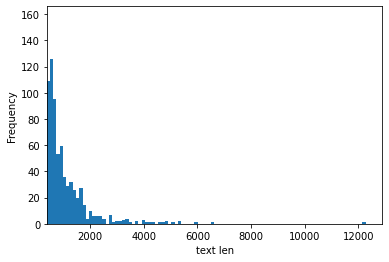

In [58]:
df.query('Абзац != "Overview"')['text_len'].plot(kind='hist', bins=100, xlim=400)
import matplotlib.pyplot as plt
plt.xlabel('text len')

In [50]:
df.query('text_len > 2000').__len__()

71

<AxesSubplot:>

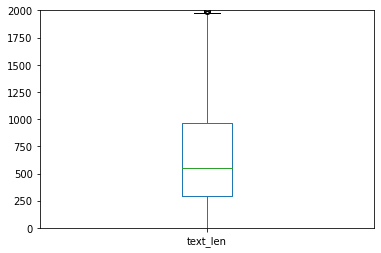

In [60]:
df.query('Абзац != "Overview"')['text_len'].plot(kind='box', ylim=(0, 2000))

In [46]:
df.query('400 < text_len < 500').iloc[0, :]['section_text']

'Create a Task\n\nSelect a Folder or Project from the left-hand Folder tree (this is where your task will be created).\xa0\nClick the green plus sign in the Workspace\'s upper left-hand corner 1\xa0and select "Task"\xa02.\xa0\nType a task name and press "Enter".\xa0\n\nYour task is created and you can begin adding task attributes from the Task View 3\xa0(assignee, due dates, and more) or right-click on a task from the List View to access quick edit options\xa04.\xa0\n\xa0'

In [37]:
len(df)

1272

In [36]:
df['text_len'].describe()

count     1261.000000
mean       734.138779
std        830.503690
min          0.000000
25%        283.000000
50%        526.000000
75%        921.000000
max      12266.000000
Name: text_len, dtype: float64

In [29]:
df['text_len'] = df['section_text'].str.len()

In [63]:
df.sort_values('text_len', ascending=False)

,Раздел,url_1,Подраздел,url_2,Статья,url_3,Абзац,url_4,section_text,keywords,text_len
560,Monitoring Panel,https://help.wrike.com/hc/en-us/categories/200...,Wrike Analyze,https://help.wrike.com/hc/en-us/sections/36000...,Wrike Analyze: Available Data,https://help.wrike.com/hc/en-us/articles/36003...,Available Data,https://help.wrike.com/hc/en-us/articles/36003...,Available Data\nThe table below contains all t...,[here],12266.0
1255,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Manager Guide (for account owners and admins),https://help.wrike.com/hc/en-us/categories/201...,Step 6. Making Remote Work Productive,https://help.wrike.com/hc/en-us/articles/36004...,Team Efficiency,https://help.wrike.com/hc/en-us/articles/36004...,Team Efficiency\n1. Keep in touch\nSchedule re...,"[daily “stand-ups”, Team Dashboard, Gantt char...",6571.0
1239,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Manager Guide (for account owners and admins),https://help.wrike.com/hc/en-us/categories/201...,Step 3: Team Onboarding and Collaboration,https://help.wrike.com/hc/en-us/articles/21032...,Change Management,https://help.wrike.com/hc/en-us/articles/21032...,Change Management\nMany people prefer staying ...,"[“Rider-Elephant-Path” model, SMART, examples ...",5939.0
1034,Account Management,https://help.wrike.com/hc/en-us/categories/200...,General Account Management,https://help.wrike.com/hc/en-us/sections/20182...,Controlled Admin Permissions,https://help.wrike.com/hc/en-us/articles/21032...,Overview,https://help.wrike.com/hc/en-us/articles/21032...,Controlled Admin Permissions are an Enterprise...,[],5877.0
825,Integrations,https://help.wrike.com/hc/en-us/categories/200...,Import and Export,https://help.wrike.com/hc/en-us/sections/36000...,Import Data From Excel,https://help.wrike.com/hc/en-us/articles/21032...,Add Data to XLS Files,https://help.wrike.com/hc/en-us/articles/21032...,Add Data to XLS Files\nDirectly from within yo...,"[Create a Folder or Project, Create a Subfolde...",5395.0
...,...,...,...,...,...,...,...,...,...,...,...
1000,Account Management,https://help.wrike.com/hc/en-us/categories/200...,General Account Management,https://help.wrike.com/hc/en-us/sections/20182...,User Groups,https://help.wrike.com/hc/en-us/articles/20960...,Remove Users from a User Group,https://help.wrike.com/hc/en-us/articles/20960...,None,None,NaN
1013,Account Management,https://help.wrike.com/hc/en-us/categories/200...,General Account Management,https://help.wrike.com/hc/en-us/sections/20182...,Wrike Bot,https://help.wrike.com/hc/en-us/articles/11500...,no title,not found,None,None,NaN
1126,Account Management,https://help.wrike.com/hc/en-us/categories/200...,Billing,https://help.wrike.com/hc/en-us/sections/20188...,Print an Invoice,https://help.wrike.com/hc/en-us/articles/21032...,no title,not found,None,None,NaN
1127,Security,https://help.wrike.com/hc/en-us/categories/200...,Single Sign-On,https://help.wrike.com/hc/en-us/sections/20189...,SSO with OneLogin,https://help.wrike.com/hc/en-us/articles/36003...,Overview,not found,None,None,NaN


In [69]:
df.rename(columns={'section1': 'section_1', 'section2': 'section_2', 'section3': 'section_3', 'section4': 'section_|4'}, inplace=True)

In [71]:
df.to_csv('data/help_title_v2.csv', index=False)

In [70]:
df

,section_1,url_1,section_2,url_2,section_3,url_3,section_|4,url_4,section_text,keywords,text_len
0,"Tasks, Folders, Projects and Spaces",https://help.wrike.com/hc/en-us/categories/200...,Tasks,https://help.wrike.com/hc/en-us/sections/20189...,Tasks,https://help.wrike.com/hc/en-us/articles/20960...,Create a Task,https://help.wrike.com/hc/en-us/articles/20960...,Create a Task\n\nSelect a Folder or Project fr...,[],440.0
1,"Tasks, Folders, Projects and Spaces",https://help.wrike.com/hc/en-us/categories/200...,Tasks,https://help.wrike.com/hc/en-us/sections/20189...,Tasks,https://help.wrike.com/hc/en-us/articles/20960...,Assign a Task,https://help.wrike.com/hc/en-us/articles/20960...,Assign a Task\nChoose the names of people to w...,"[invite a user to Wrike, email notification, d...",1128.0
2,"Tasks, Folders, Projects and Spaces",https://help.wrike.com/hc/en-us/categories/200...,Tasks,https://help.wrike.com/hc/en-us/sections/20189...,Tasks,https://help.wrike.com/hc/en-us/articles/20960...,Schedule a Task,https://help.wrike.com/hc/en-us/articles/20960...,"Schedule a Task\nIn the List view, you can set...","[Wrike for Professional Services, Wrike Resource]",1131.0
3,"Tasks, Folders, Projects and Spaces",https://help.wrike.com/hc/en-us/categories/200...,Tasks,https://help.wrike.com/hc/en-us/sections/20189...,Tasks,https://help.wrike.com/hc/en-us/articles/20960...,Tag a Task (Organize Tasks into Folders),https://help.wrike.com/hc/en-us/articles/20960...,Tag a Task (Organize Tasks into Folders)\nWhen...,[mass actions],1008.0
4,"Tasks, Folders, Projects and Spaces",https://help.wrike.com/hc/en-us/categories/200...,Tasks,https://help.wrike.com/hc/en-us/sections/20189...,Tasks,https://help.wrike.com/hc/en-us/articles/20960...,Follow a Task,https://help.wrike.com/hc/en-us/articles/20960...,Follow a Task\nFollowing a task is a great way...,"[Activity Stream, instant email notifications,...",1040.0
...,...,...,...,...,...,...,...,...,...,...,...
1267,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Team Member Guide (for account users),https://help.wrike.com/hc/en-us/categories/201...,Step 3: Collaborating in Wrike,https://help.wrike.com/hc/en-us/articles/21444...,Developing Wrike Habits,https://help.wrike.com/hc/en-us/articles/21444...,Developing Wrike Habits\nLearning new tools ma...,[workspace],1536.0
1268,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Team Member Guide (for account users),https://help.wrike.com/hc/en-us/categories/201...,Step 3: Collaborating in Wrike,https://help.wrike.com/hc/en-us/articles/21444...,More Resources,https://help.wrike.com/hc/en-us/articles/21444...,More Resources\n\nBest Practices:\n\nYour Typi...,"[Your Typical Day in Wrike, Organize Work-Rela...",265.0
1269,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Team Member Guide (for account users),https://help.wrike.com/hc/en-us/categories/201...,Step 4: Work from Home Productively,https://help.wrike.com/hc/en-us/articles/36004...,Overview,https://help.wrike.com/hc/en-us/articles/36004...,Overview\nRemote work may be a company policy ...,[],382.0
1270,Getting Started,https://help.wrike.com/hc/en-us/categories/201...,Team Member Guide (for account users),https://help.wrike.com/hc/en-us/categories/201...,Step 4: Work from Home Productively,https://help.wrike.com/hc/en-us/articles/36004...,Personal Productivity,https://help.wrike.com/hc/en-us/articles/36004...,Personal Productivity\n\n1. Organize your work...,"[Instagram, Read more tips, Google Calendar, S...",4359.0
